### Plotting WY23 winter and non-winter event NO3 yields, NO3/Q yield ratios, and cumulative yields. 
### Also bringing in soil resin NO3 cumulative 'yields'

### Contextualizaing data: Kincaid et al., 2020 Hungerford and Wade data (2014-2018 non-winter events)

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“The following aesthetics were dropped during statistical transformation: colour.
ℹ This can happen when ggplot fails to infer the correct grouping structure in the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical variable into a factor?”
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“The following aesthetics were dropped during statistical transformation: colour.
ℹ This can happen when ggplot fails to infer the correct grouping structure in the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical variable into a factor?”


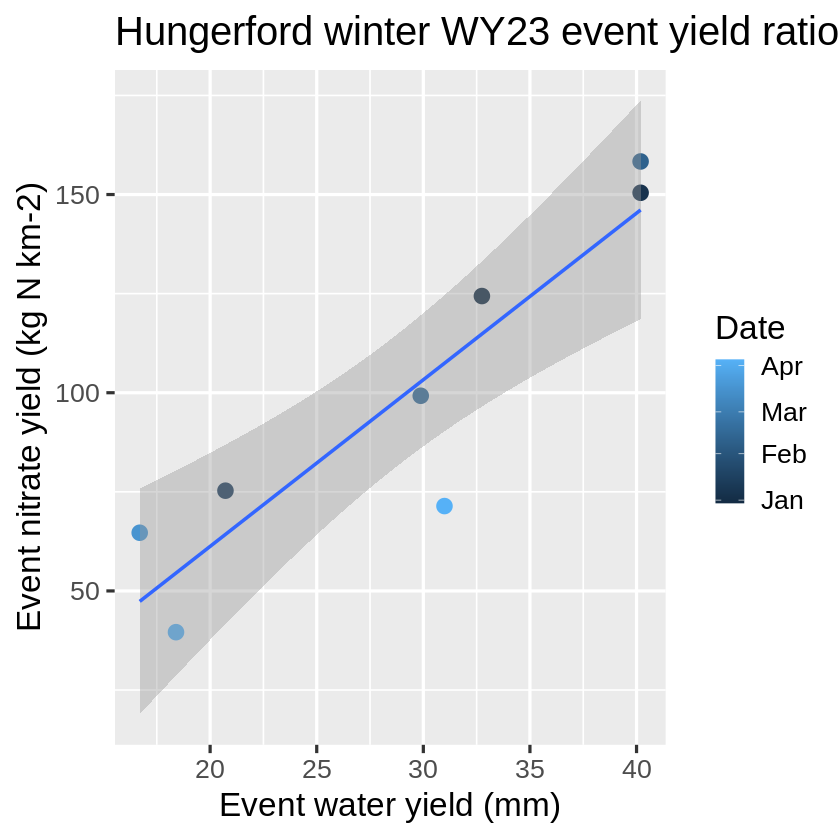

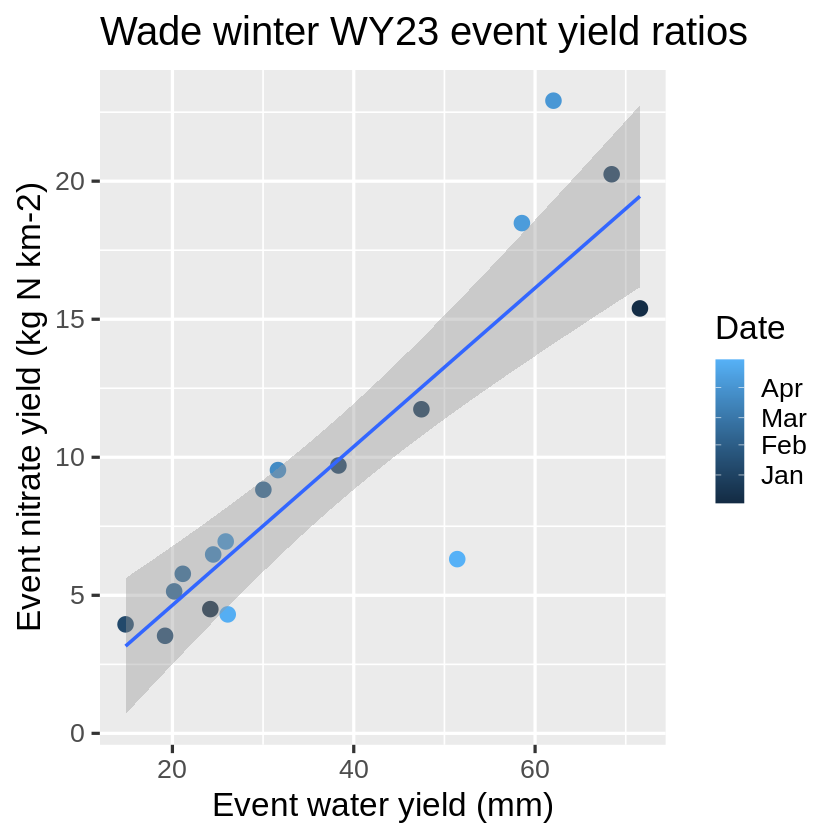

In [2]:
################
# LOAD PACKAGES #
################

library(tidyverse)
library(viridis)
library(lubridate)
library(patchwork)

###################
# SET DIRECTORIES #
###################

setwd("~//OneDrive/git-repos/EMMA")

input_dir <- "soil-resins/"
output_dir <- "soil-resins/output"

# custom event delineation scripts puts original yields here:
SV_2021_2023_input_dir <- "~//OneDrive/git-repos/cQ_analysis/millar2021_R_separation_hysteresis/sonya-may24/custom-events_output/"
DK_2014_2018_yield_input_dir <- "~//OneDrive/git-repos/cQ_analysis/millar2021_R_separation_hysteresis/kincaid2020_hydroshare/output/"

################
# READ IN DATA #
################

# Read in cumulative 2021-2023 winter NO3 yield data
# Notebook here: https://github.com/MeganEDuffy/cQ_analysis/blob/main/millar2021_R_separation_hysteresis/sonya-may24/SV-2024.05.24-data_Millar_custom-input.ipynb
hungerford_yield_data <- read.csv(file.path(SV_2021_2023_input_dir, "Hungerford_NO3_2021-2023_StormEventSummaryDataCustomDelineations.csv")) %>%
  mutate(Date = as.Date(start))  # Convert 'start' to Date format (drop time)

wade_yield_data <- read.csv(file.path(SV_2021_2023_input_dir, "Wade_NO3_2021-2023_StormEventSummaryDataCustomDelineations.csv")) %>%
  mutate(Date = as.Date(start)) # Convert 'start' to Date format (drop time)

# Read in Millar-delineated 2021-2023 non-ice NO3 yield and water yield data
# Same notebook as the custom input, but it also runs the Millar event delineation, then we'll separate out non-winter further down
# Just the 0.996 RDF results with SFT = 0.1
hungerford_yield_data_yearly_2123 <- read.csv(file.path(SV_2021_2023_input_dir, "Hungerford_NO3_2021-2023_StormEventSummaryData.csv")) %>%
  mutate(Date = as.Date(start))  # Convert 'start' to Date format (drop time)

# Just the 0.996 RDF results with SFT = 0.05
wade_yield_data_yearly_2123 <- read.csv(file.path(SV_2021_2023_input_dir, "Wade_NO3_2021-2023_StormEventSummaryData.csv")) %>%
  mutate(Date = as.Date(start)) # Convert 'start' to Date format (drop time)

# Read in Kincaid 2014-2018 non-ice NO3 yield data
# Notebook here: https://github.com/MeganEDuffy/cQ_analysis/blob/main/millar2021_R_separation_hysteresis/kincaid2020_hydroshare/Kincaid2020_Millar_custom-input.ipynb
hungerford_yield_data_yearly <- read.csv(file.path(DK_2014_2018_yield_input_dir, "Hungerford_NO3_2014-2018_StormEventSummaryDataCustomDelineations.csv")) %>%
  mutate(Date = as.Date(start))  # Convert 'start' to Date format (drop time)

wade_yield_data_yearly <- read.csv(file.path(DK_2014_2018_yield_input_dir, "Wade_NO3_2014-2018_StormEventSummaryDataCustomDelineations.csv")) %>%
  mutate(Date = as.Date(start))  # Convert 'start' to Date format (drop time)

# Read in the compiled monthly available NH4/NO3 data (PO4 until 2023)
#resin_data <- read.csv(file.path(input_dir, "Resin_timeseries.csv")) #%>%
  #mutate(Date = paste(Month, "1", Year, sep = " "),
         #Date = mdy(Date))  # Convert the concatenated string to date format

###############
# FILTER DATA #
###############

# Define Water Year 2022
wy22_start <- as.Date("2021-10-01")
wy22_end <- as.Date("2022-09-30")

# Define Water Year 2023
wy23_start <- as.Date("2022-10-01")
wy23_end <- as.Date("2023-09-30")

# Define Winter Water Year 2023
wwy23_start <- as.Date("2022-12-01")
wwy23_end <- as.Date("2023-05-01")

# Filter SV data for Water Year 2022
hungerford_yield_data_wy22 <- hungerford_yield_data %>%
  filter(Date >= wy22_start & Date <= wy22_end)

# Filter SV data for Water Year 2023
hungerford_yield_data_wy23 <- hungerford_yield_data %>%
  filter(Date >= wy23_start & Date <= wy23_end)

# Filter SV data for Water Year 2022
wade_yield_data_wy22 <- wade_yield_data %>%
  filter(Date >= wy22_start & Date <= wy22_end)

# Filter SV data for Water Year 2023
wade_yield_data_wy23 <- wade_yield_data %>%
  filter(Date >= wy23_start & Date <= wy23_end)

# Filter non-winter data for WY23
hungerford_yield_data_yearly_23 <- hungerford_yield_data_yearly_2123 %>%
  filter(Date >= wy23_start & Date <= wy23_end)

# Filter non-winter data for WY23
wade_yield_data_yearly_23 <- wade_yield_data_yearly_2123 %>%
  filter(Date >= wy23_start & Date <= wy23_end)

# Filter non-winter data for WY22
hungerford_yield_data_yearly_22 <- hungerford_yield_data_yearly_2123 %>%
  filter(Date >= wy22_start & Date <= wy22_end)

# Filter non-winter data for WY23
wade_yield_data_yearly_22 <- wade_yield_data_yearly_2123 %>%
  filter(Date >= wy22_start & Date <= wy22_end)

# Filter data for Water Year 2023
#resin_data_wy23 <- resin_data %>%
  #filter(Date >= wy23_start & Date <= wy23_end)

# Filter data for Winter Water Year 2023
#resin_data_winter_wy23 <- resin_data %>%
  #filter(Date >= wwy23_start & Date <= wwy23_end)

######################
# PLOT YIELD RATIOS #
#####################

ggplot(hungerford_yield_data_wy23, aes(x=water_yield_mm, y=constit_yield_mm, color=Date)) +
    geom_point(size = 4) +    # Use hollow circles
    geom_smooth(method=lm) +   # Add linear regression line  # (by default includes 95% confidence region)
    xlab("Event water yield (mm)") +
    ylab("Event nitrate yield (kg N km-2)") +
    ggtitle("Hungerford winter WY23 event yield ratios") +
    theme_grey(base_size = 20)

ggplot(wade_yield_data_wy23, aes(x=water_yield_mm, y=constit_yield_mm, color=Date)) +
    geom_point(size = 4) +    # Use hollow circles
    geom_smooth(method=lm) +   # Add linear regression line  # (by default includes 95% confidence region)
    xlab("Event water yield (mm)") +
    ylab("Event nitrate yield (kg N km-2)") +
    ggtitle("Wade winter WY23 event yield ratios") +
    theme_grey(base_size = 20)

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“The following aesthetics were dropped during statistical transformation: colour
ℹ This can happen when ggplot fails to infer the correct grouping structure in the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical variable into a factor?”
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“The following aesthetics were dropped during statistical transformation: colour
ℹ This can happen when ggplot fails to infer the correct grouping structure in the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical variable into a factor?”


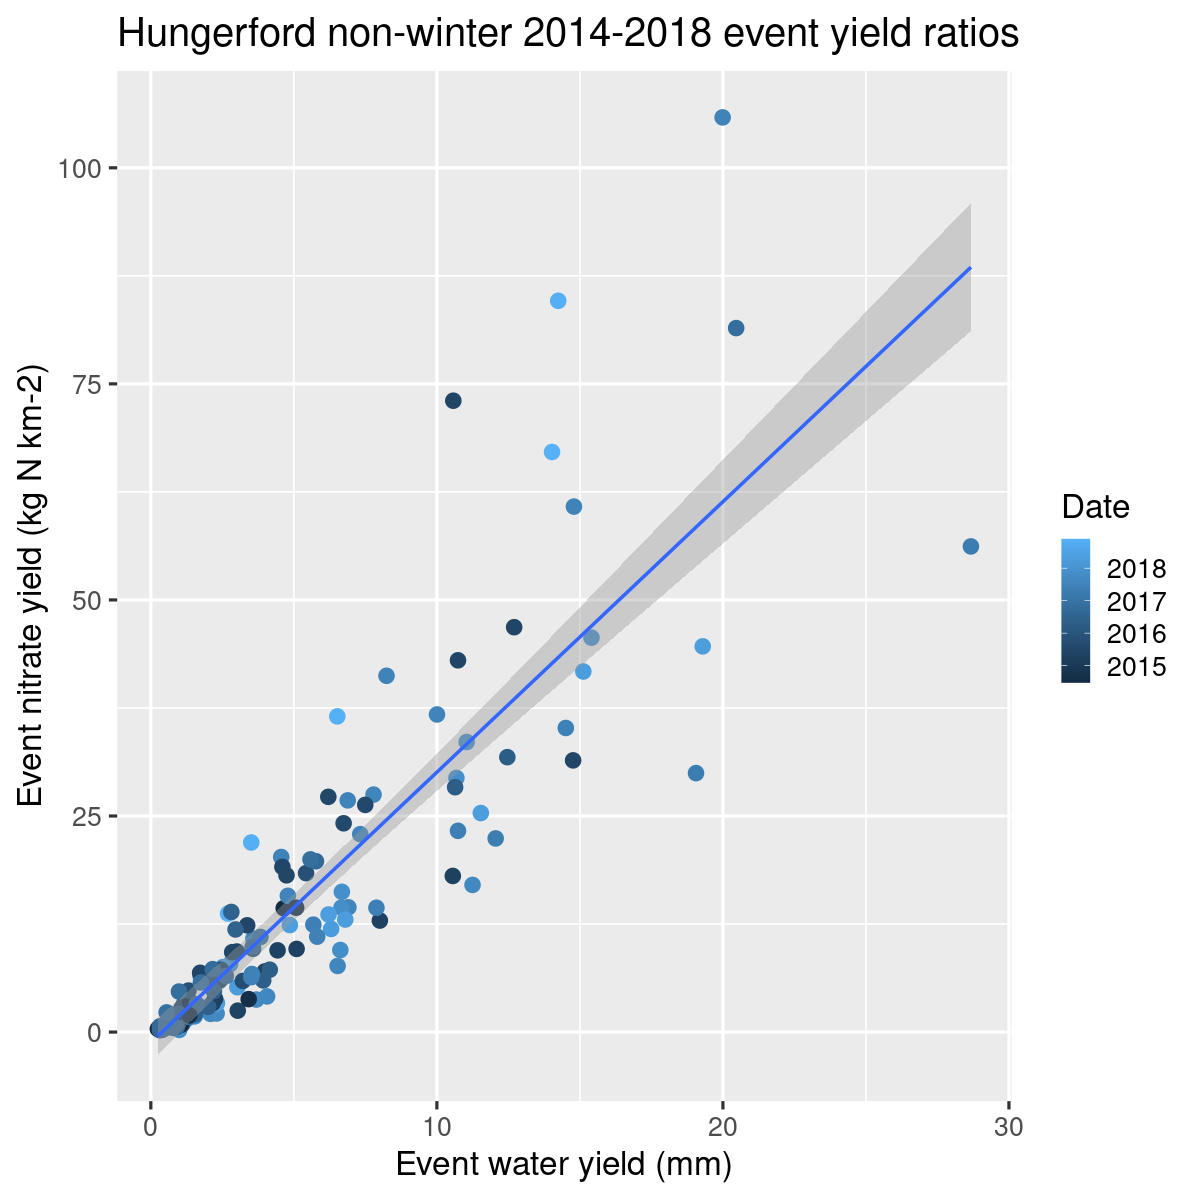

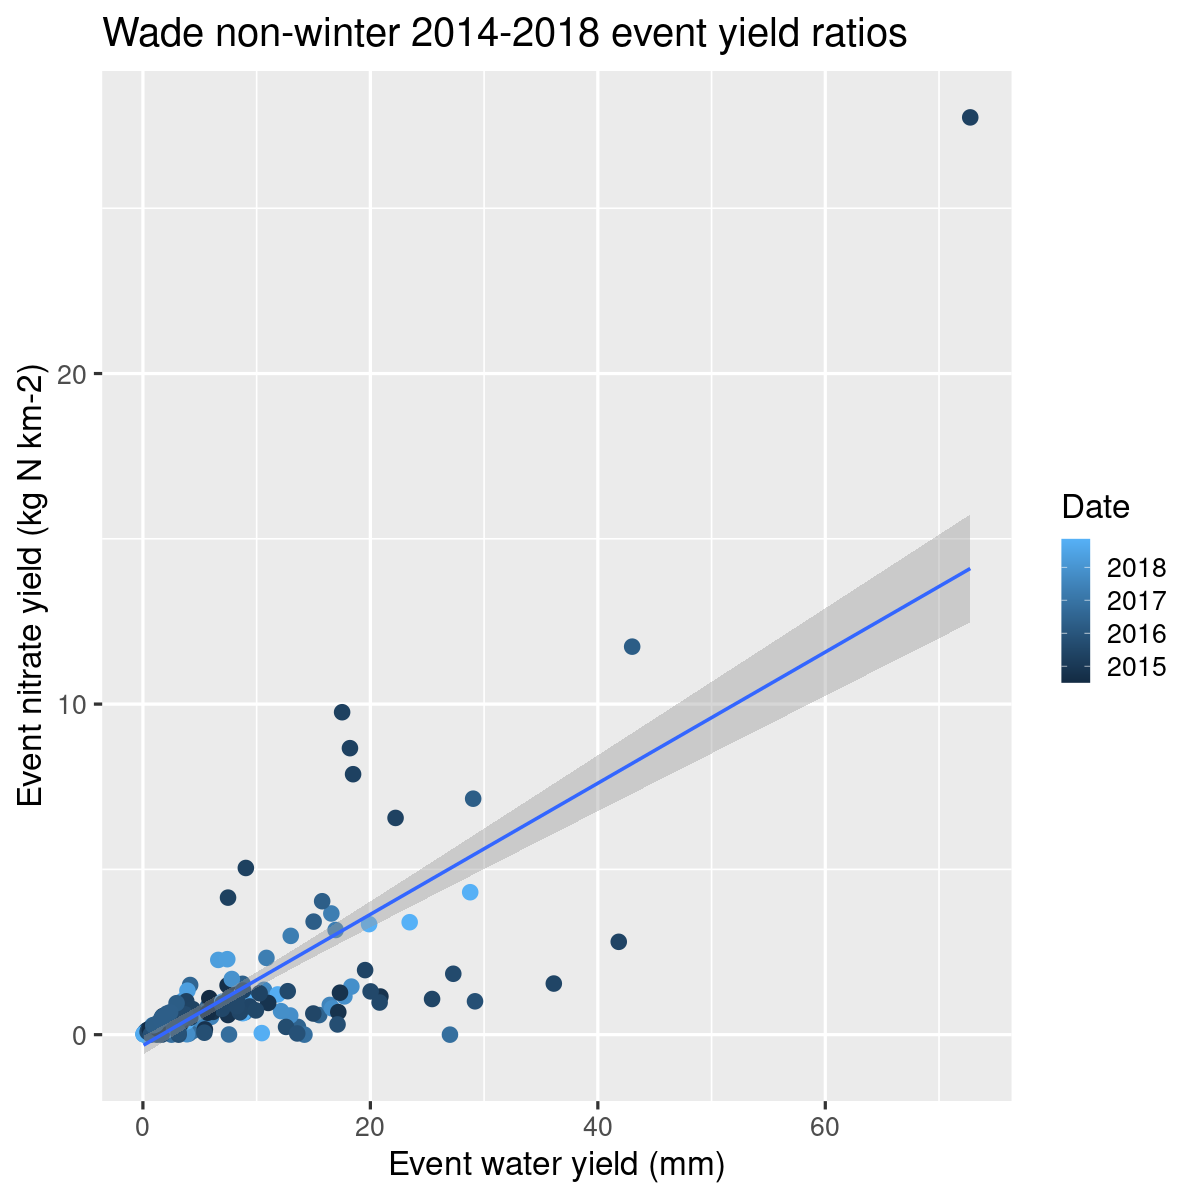

In [26]:
######################
# PLOT YIELD RATIOS #
#####################

ggplot(hungerford_yield_data_yearly, aes(x=water_yield_mm, y=constit_yield_mm, color=Date)) +
    geom_point(size = 4) +    # Use hollow circles
    geom_smooth(method=lm) +   # Add linear regression line  # (by default includes 95% confidence region)
    xlab("Event water yield (mm)") +
    ylab("Event nitrate yield (kg N km-2)") +
    ggtitle("Hungerford non-winter 2014-2018 event yield ratios") +
    theme_grey(base_size = 20)

ggplot(wade_yield_data_yearly, aes(x=water_yield_mm, y=constit_yield_mm, color=Date)) +
    geom_point(size = 4) +    # Use hollow circles
    geom_smooth(method=lm) +   # Add linear regression line  # (by default includes 95% confidence region)
    xlab("Event water yield (mm)") +
    ylab("Event nitrate yield (kg N km-2)") +
    ggtitle("Wade non-winter 2014-2018 event yield ratios") +
    theme_grey(base_size = 20)

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“The following aesthetics were dropped during statistical transformation: colour.
ℹ This can happen when ggplot fails to infer the correct grouping structure in the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical variable into a factor?”
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“The following aesthetics were dropped during statistical transformation: colour.
ℹ This can happen when ggplot fails to infer the correct grouping structure in the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical variable into a factor?”


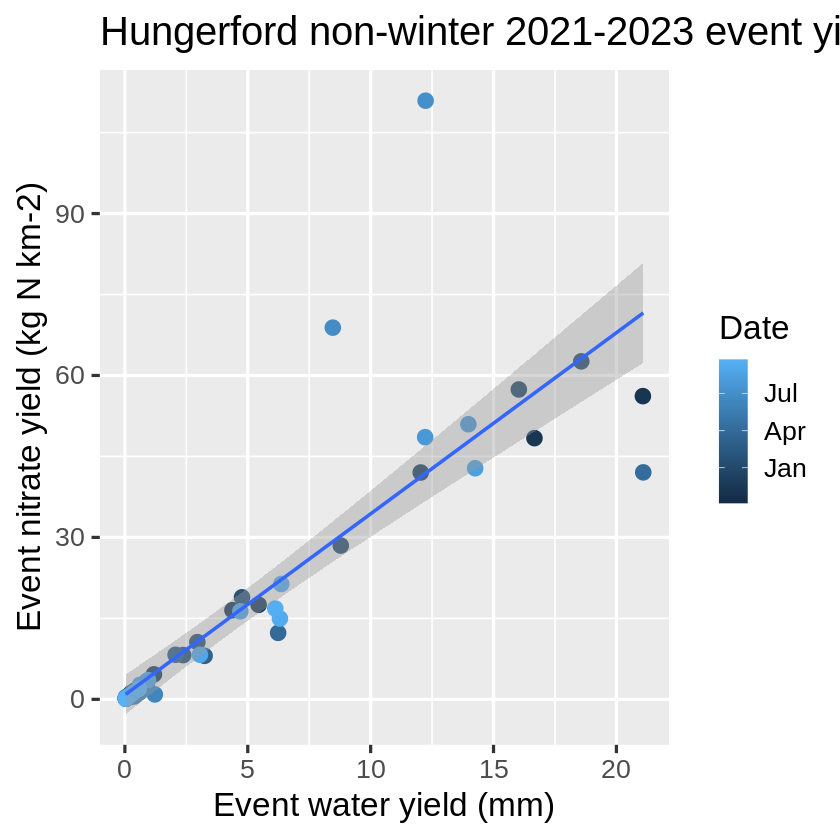

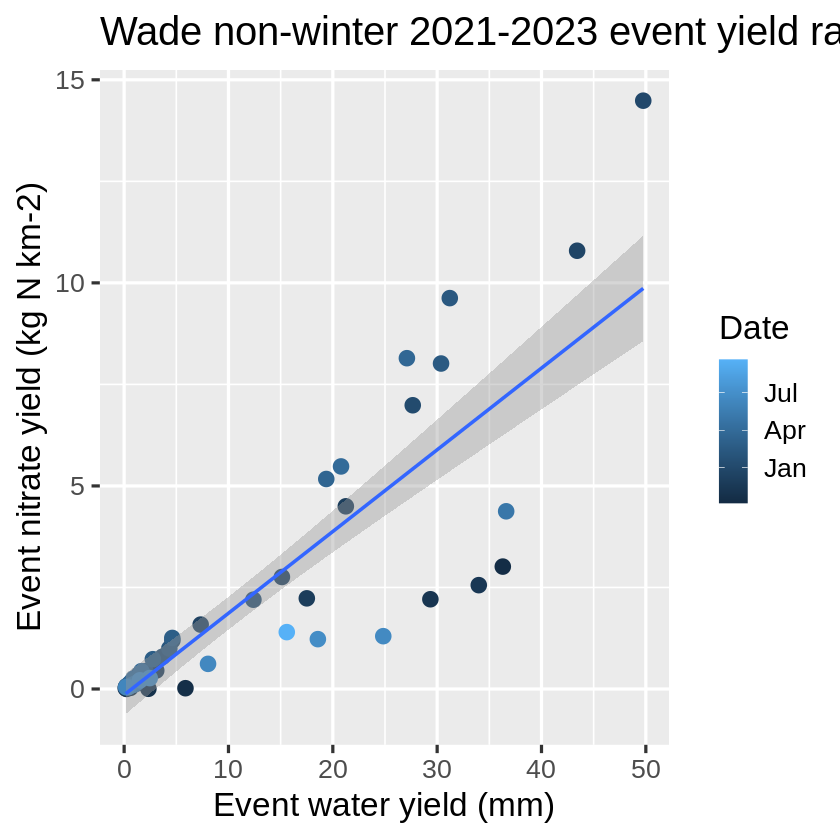

In [3]:
######################
# PLOT YIELD RATIOS #
#####################

ggplot(hungerford_yield_data_yearly_23, aes(x=water_yield_mm, y=constit_yield_mm, color=Date)) +
    geom_point(size = 4) +    # Use hollow circles
    geom_smooth(method=lm) +   # Add linear regression line  # (by default includes 95% confidence region)
    xlab("Event water yield (mm)") +
    ylab("Event nitrate yield (kg N km-2)") +
    ggtitle("Hungerford non-winter 2021-2023 event yield ratios") +
    theme_grey(base_size = 20)

ggplot(wade_yield_data_yearly_23, aes(x=water_yield_mm, y=constit_yield_mm, color=Date)) +
    geom_point(size = 4) +    # Use hollow circles
    geom_smooth(method=lm) +   # Add linear regression line  # (by default includes 95% confidence region)
    xlab("Event water yield (mm)") +
    ylab("Event nitrate yield (kg N km-2)") +
    ggtitle("Wade non-winter 2021-2023 event yield ratios") +
    theme_grey(base_size = 20)

`geom_smooth()` using formula = 'y ~ x'


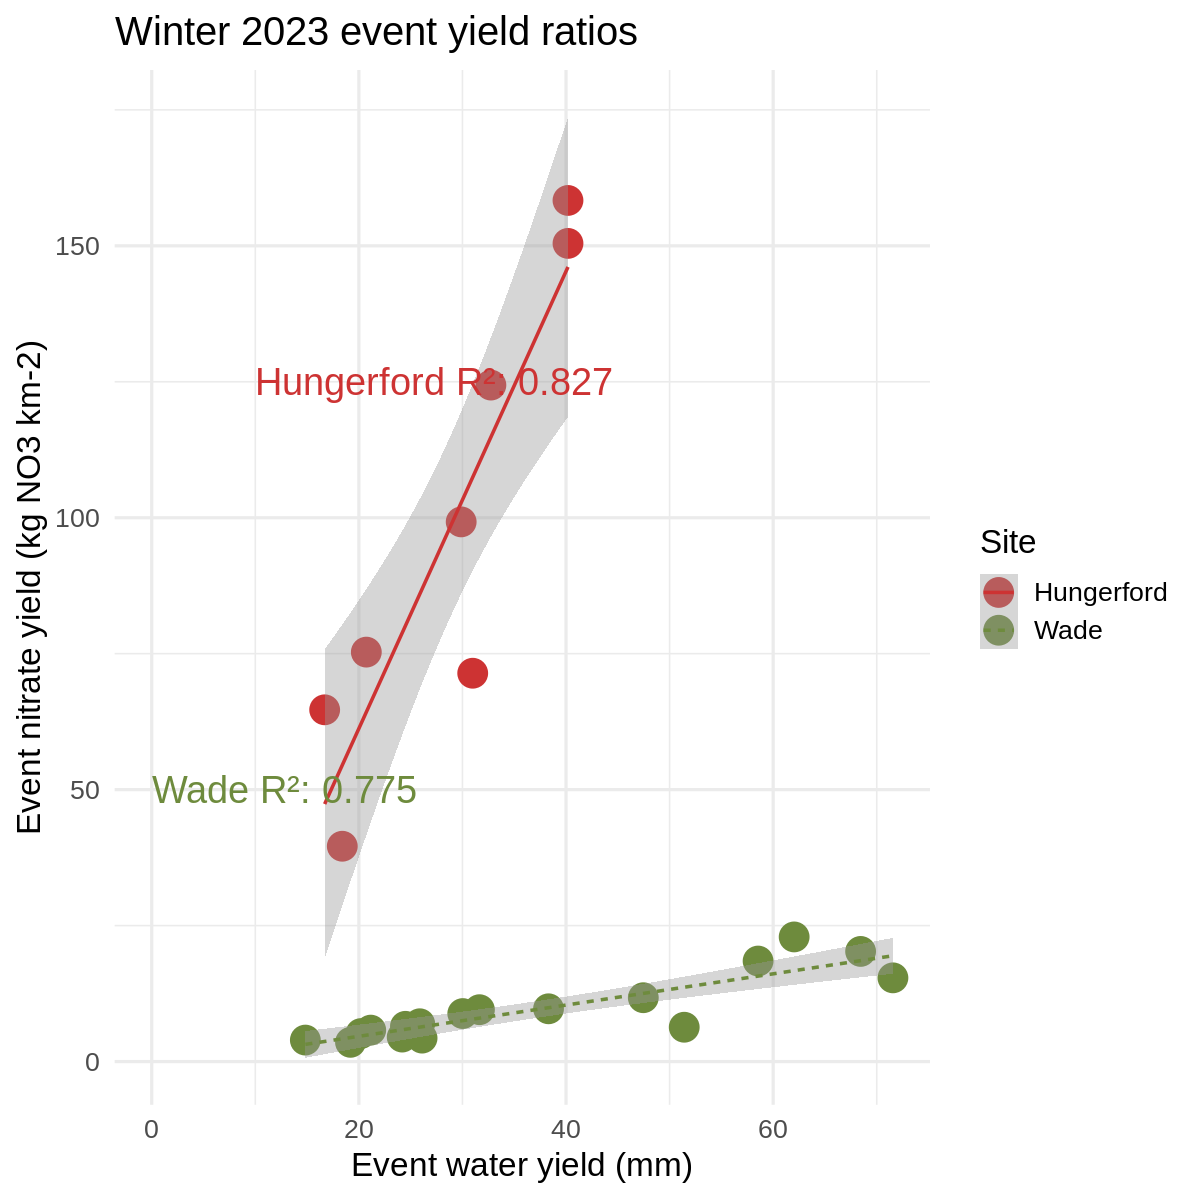

In [4]:
# Load required packages
library(tidyverse)

# Combine winter Hungerford and Wade data into a single data frame with a site identifier
hungerford_yield_data_wy23 <- hungerford_yield_data_wy23 %>%
  mutate(Site = "Hungerford") %>%
  mutate(Season = "winter")

wade_yield_data_wy23 <- wade_yield_data_wy23 %>%
  mutate(Site = "Wade") %>%
  mutate(Season = "winter")

# Add non-winter Hungerford and Wade data into a single data frame with a site identifier, too
hungerford_yield_data_yearly <- hungerford_yield_data_yearly %>%
  mutate(Site = "Hungerford") %>%
  mutate(Season = "non-winter")

wade_yield_data_yearly <- wade_yield_data_yearly %>%
  mutate(Site = "Wade") %>%
  mutate(Season = "non-winter")

#combined_data <- bind_rows(hungerford_yield_data_wy23, wade_yield_data_wy23, hungerford_yield_data_yearly, wade_yield_data_yearly)
combined_data <- bind_rows(hungerford_yield_data_wy23, wade_yield_data_wy23)

# Fit linear models to calculate R² values
hungerford_lm <- lm(constit_yield_mm ~ water_yield_mm, 
                    data = filter(combined_data, Site == "Hungerford"))
hungerford_r2 <- summary(hungerford_lm)$r.squared

wade_lm <- lm(constit_yield_mm ~ water_yield_mm, 
              data = filter(combined_data, Site == "Wade"))
wade_r2 <- summary(wade_lm)$r.squared

# Create the plot

options(repr.plot.width = 10, repr.plot.height = 10) 

ggplot(combined_data, aes(x = water_yield_mm, y = constit_yield_mm, color = Site)) +
  geom_point(size = 8) +
  geom_smooth(method = lm, aes(linetype = Site)) +
  scale_color_manual(values = c("Hungerford" = "#CD3333", "Wade" = "darkolivegreen4")) +
  labs(x = "Event water yield (mm)",
       y = "Event nitrate yield (kg NO3 km-2)",
       title = "Winter 2023 event yield ratios") +
  #xlim(0, 125) +
  #ylim(0, 200) +
  theme_minimal(base_size = 20) +
  annotate("text", x = 10, y = 125, label = paste0("Hungerford R²: ", round(hungerford_r2, 3)), 
           color = "#CD3333", hjust = 0, size = 8) +
  annotate("text", x = 0, y = 50, label = paste0("Wade R²: ", round(wade_r2, 3)), 
           color = "darkolivegreen4", hjust = 0, size = 8)

`geom_smooth()` using formula = 'y ~ x'


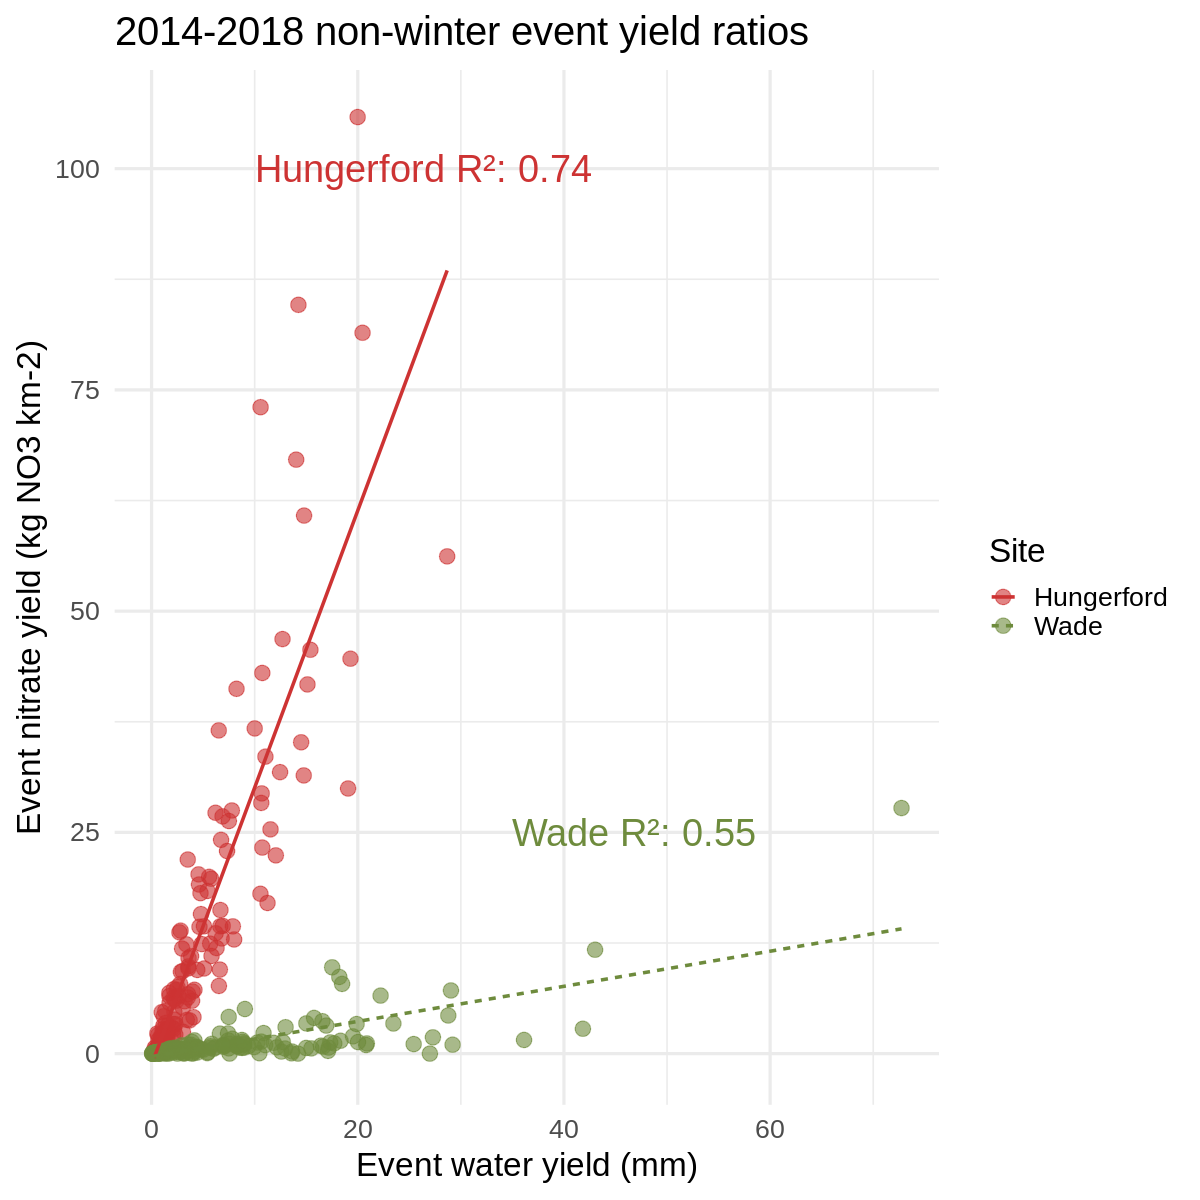

In [5]:
# Load required packages
library(tidyverse)

# Combine winter Hungerford and Wade data into a single data frame with a site identifier
hungerford_yield_data_wy23 <- hungerford_yield_data_wy23 %>%
  mutate(Site = "Hungerford") %>%
  mutate(Season = "winter")

wade_yield_data_wy23 <- wade_yield_data_wy23 %>%
  mutate(Site = "Wade") %>%
  mutate(Season = "winter")

# Add non-winter Hungerford and Wade data into a single data frame with a site identifier, too
hungerford_yield_data_yearly <- hungerford_yield_data_yearly %>%
  mutate(Site = "Hungerford") %>%
  mutate(Season = "non-winter")

wade_yield_data_yearly <- wade_yield_data_yearly %>%
  mutate(Site = "Wade") %>%
  mutate(Season = "non-winter")

#combined_data <- bind_rows(hungerford_yield_data_wy23, wade_yield_data_wy23, hungerford_yield_data_yearly, wade_yield_data_yearly)
combined_data <- bind_rows(hungerford_yield_data_yearly, wade_yield_data_yearly)

# Fit linear models to calculate R² values
hungerford_lm <- lm(constit_yield_mm ~ water_yield_mm, 
                    data = filter(combined_data, Site == "Hungerford"))
hungerford_r2 <- summary(hungerford_lm)$r.squared

wade_lm <- lm(constit_yield_mm ~ water_yield_mm, 
              data = filter(combined_data, Site == "Wade"))
wade_r2 <- summary(wade_lm)$r.squared

# Create the plot

options(repr.plot.width = 10, repr.plot.height = 10) 

ggplot(combined_data, aes(x = water_yield_mm, y = constit_yield_mm, color = Site)) +
  geom_point(size = 4, alpha = 0.6) +
  geom_smooth(method = lm, se = FALSE, aes(linetype = Site)) +
  scale_color_manual(values = c("Hungerford" = "#CD3333", "Wade" = "darkolivegreen4")) +
  labs(x = "Event water yield (mm)",
       y = "Event nitrate yield (kg NO3 km-2)",
       title = "2014-2018 non-winter event yield ratios") +
  #xlim(0, 125) +
  #ylim(0, 475) +
  theme_minimal(base_size = 20) +
  annotate("text", x = 10, y = 100, label = paste0("Hungerford R²: ", round(hungerford_r2, 2)), 
           color = "#CD3333", hjust = 0, size = 8) +
  annotate("text", x = 35, y = 25, label = paste0("Wade R²: ", round(wade_r2, 2)), 
           color = "darkolivegreen4", hjust = 0, size = 8)

`geom_smooth()` using formula = 'y ~ x'


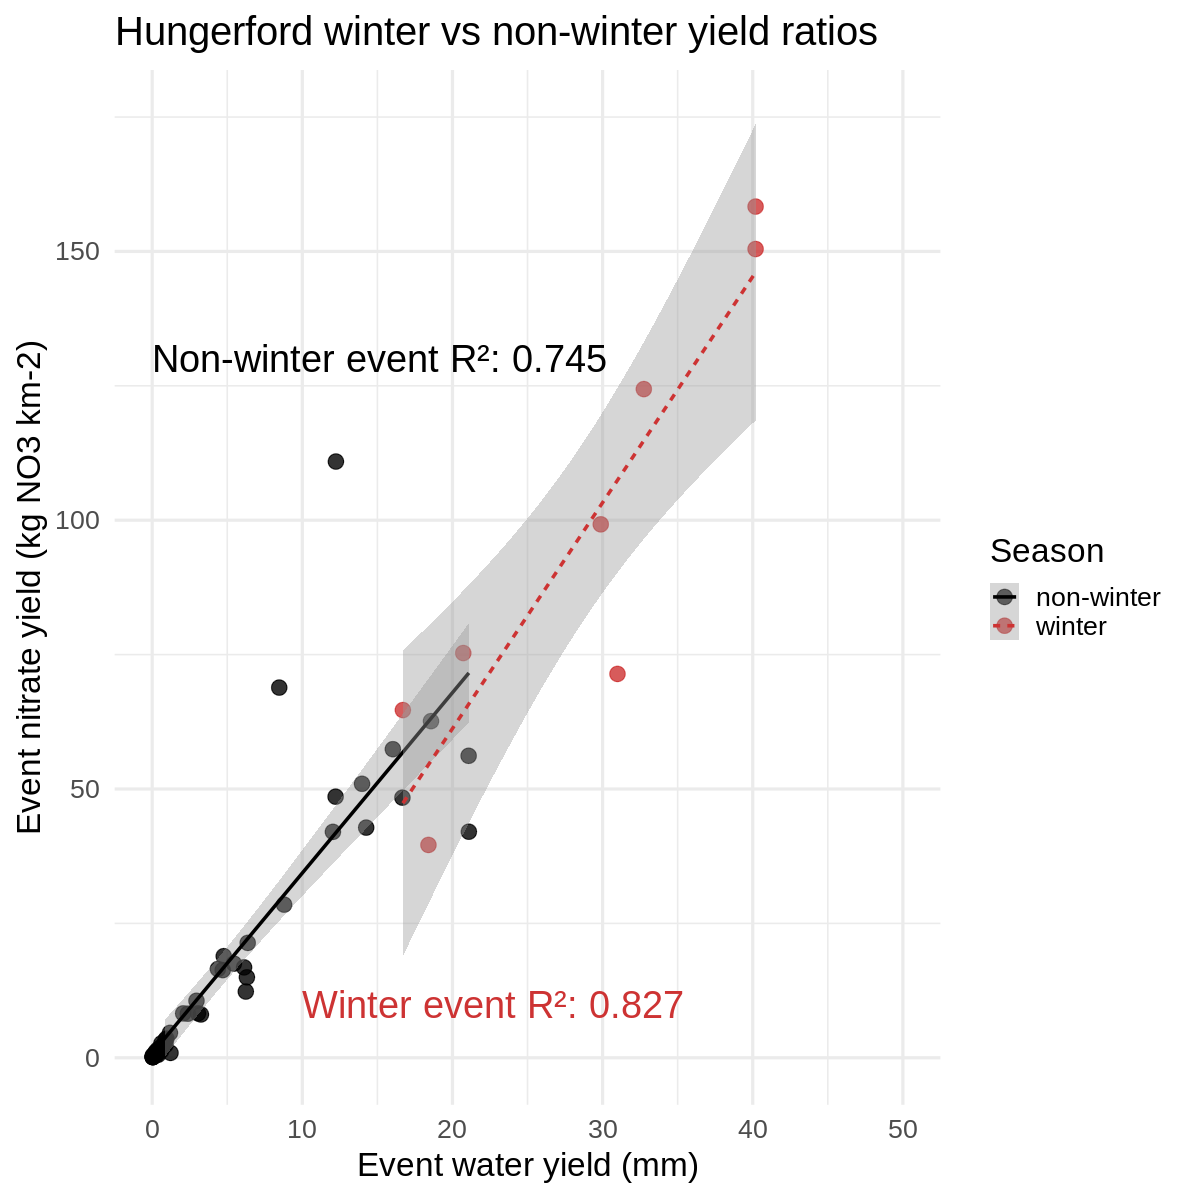

In [6]:
# Load required packages
library(tidyverse)

# Combine winter and non-winter Hungerford 
hungerford_yield_data_wy23 <- hungerford_yield_data_wy23 %>%
  mutate(Site = "Hungerford") %>%
  mutate(Season = "winter")

#wade_yield_data_wy23 <- wade_yield_data_wy23 %>%
  #mutate(Site = "Wade") %>%
  #mutate(Season = "winter")

# Add non-winter Hungerford
hungerford_yield_data_yearly_23 <- hungerford_yield_data_yearly_23 %>%
  mutate(Site = "Hungerford") %>%
  mutate(Season = "non-winter")

#wade_yield_data_yearly <- wade_yield_data_yearly %>%
  #mutate(Site = "Wade") %>%
  #mutate(Season = "non-winter")

#combined_data <- bind_rows(hungerford_yield_data_wy23, wade_yield_data_wy23, hungerford_yield_data_yearly, wade_yield_data_yearly)
combined_data <- bind_rows(hungerford_yield_data_wy23, hungerford_yield_data_yearly_23)

# Fit linear models to calculate R² values
hungerford_winter_lm <- lm(constit_yield_mm ~ water_yield_mm, 
                    data = filter(combined_data, Season == "winter"))
hungerford_winter_r2 <- summary(hungerford_winter_lm)$r.squared

hungerford_nonwinter_lm <- lm(constit_yield_mm ~ water_yield_mm, 
              data = filter(combined_data, Season == "non-winter"))
hungerford_nonwinter_r2 <- summary(hungerford_nonwinter_lm)$r.squared

# Create the plot

options(repr.plot.width = 10, repr.plot.height = 10) 

ggplot(combined_data, aes(x = water_yield_mm, y = constit_yield_mm, color = Season)) +
  geom_point(size = 4, alpha = 0.8) +
  geom_smooth(method = lm, aes(linetype = Season)) +
  scale_color_manual(values = c("winter" = "#CD3333", "non-winter" = "black")) +
  labs(x = "Event water yield (mm)",
       y = "Event nitrate yield (kg NO3 km-2)",
       title = "Hungerford winter vs non-winter yield ratios") +
  xlim(0, 50) +
  ylim(0, 175) +
  theme_minimal(base_size = 20) +
  annotate("text", x = 10, y = 10, label = paste0("Winter event R²: ", round(hungerford_winter_r2, 3)), 
           color = "#CD3333", hjust = 0, size = 8) +
  annotate("text", x = 0, y = 130, label = paste0("Non-winter event R²: ", round(hungerford_nonwinter_r2, 3)), 
           color = "black", hjust = 0, size = 8)

In [7]:
# Combine winter and non-winter Hungerford 
hungerford_yield_data_wy22 <- hungerford_yield_data_wy22 %>%
  mutate(Site = "Hungerford") %>%
  mutate(Season = "winter")

wade_yield_data_wy22 <- wade_yield_data_wy22 %>%
  mutate(Site = "Wade") %>%
  mutate(Season = "winter")

# Add non-winter Hungerford
hungerford_yield_data_yearly_22 <- hungerford_yield_data_yearly_22 %>%
  mutate(Site = "Hungerford") %>%
  mutate(Season = "non-winter")

wade_yield_data_yearly_22 <- wade_yield_data_yearly_22 %>%
  mutate(Site = "Wade") %>%
  mutate(Season = "non-winter")

`geom_smooth()` using formula = 'y ~ x'


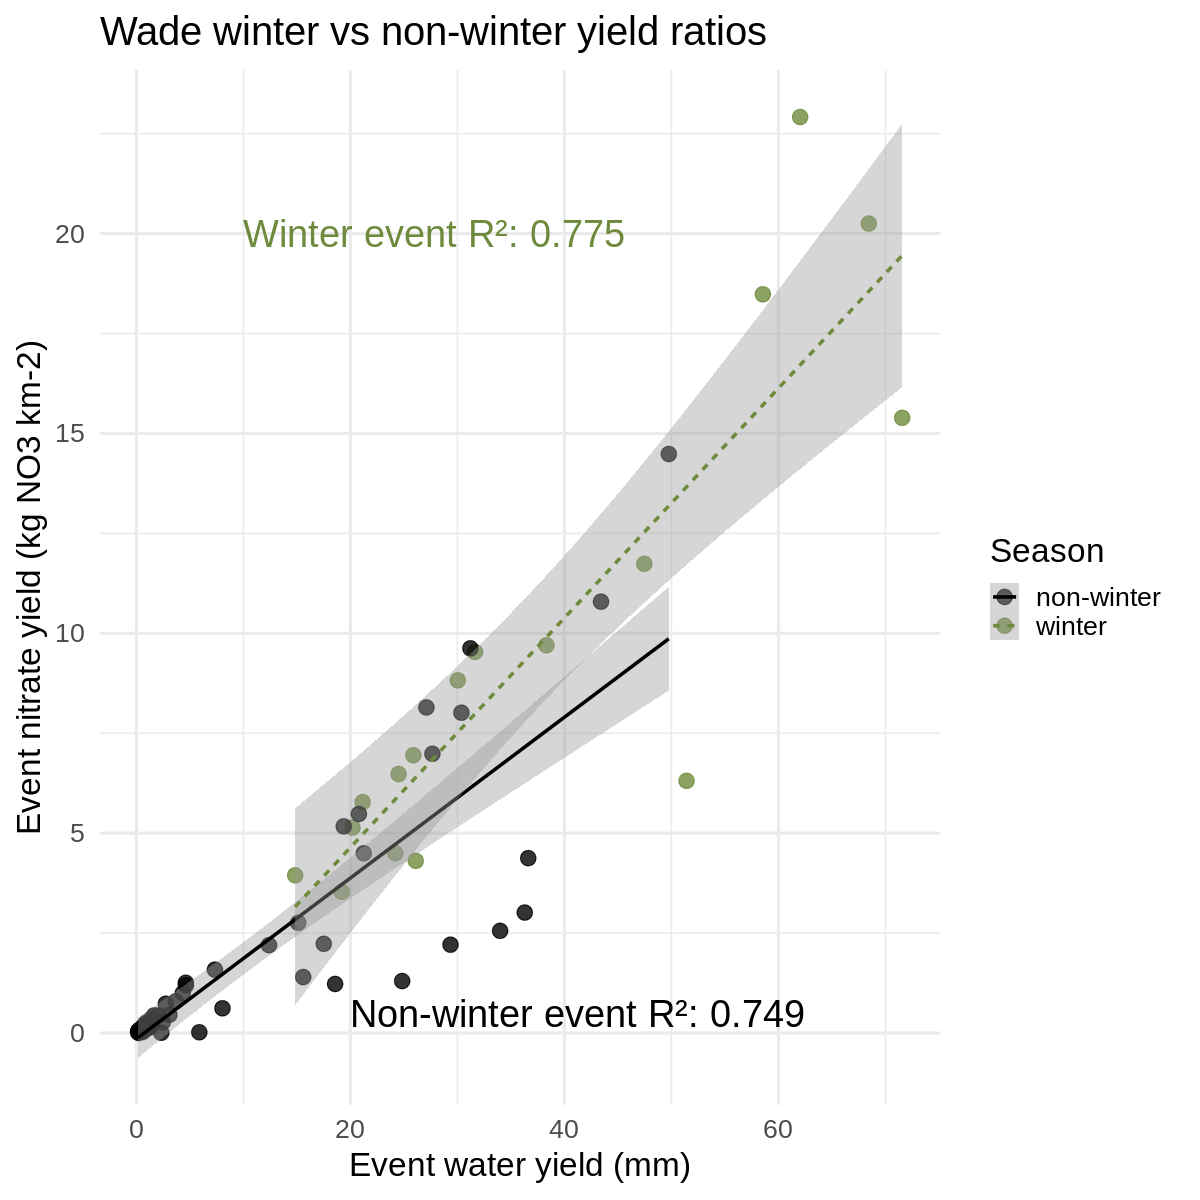

In [8]:
# Load required packages
library(tidyverse)

# Combine winter and non-winter Hungerford 
hungerford_yield_data_wy23 <- hungerford_yield_data_wy23 %>%
  mutate(Site = "Hungerford") %>%
  mutate(Season = "winter")

wade_yield_data_wy23 <- wade_yield_data_wy23 %>%
  mutate(Site = "Wade") %>%
  mutate(Season = "winter")

# Add non-winter Hungerford
hungerford_yield_data_yearly_23 <- hungerford_yield_data_yearly_23 %>%
  mutate(Site = "Hungerford") %>%
  mutate(Season = "non-winter")

wade_yield_data_yearly_23 <- wade_yield_data_yearly_23 %>%
  mutate(Site = "Wade") %>%
  mutate(Season = "non-winter")

combined_data_hungerford_23 <- bind_rows(hungerford_yield_data_wy23, hungerford_yield_data_yearly_23)
combined_data_wade_23 <- bind_rows(wade_yield_data_wy23, wade_yield_data_yearly_23)

combined_data_hungerford_22 <- bind_rows(hungerford_yield_data_wy22, hungerford_yield_data_yearly_22)
combined_data_wade_22 <- bind_rows(wade_yield_data_wy22, wade_yield_data_yearly_22)

# Fit linear models to calculate R² values
wade_winter_lm <- lm(constit_yield_mm ~ water_yield_mm, 
                    data = filter(combined_data_wade_23, Season == "winter"))
wade_winter_r2 <- summary(wade_winter_lm)$r.squared

wade_nonwinter_lm <- lm(constit_yield_mm ~ water_yield_mm, 
              data = filter(combined_data_wade_23, Season == "non-winter"))
wade_nonwinter_r2 <- summary(wade_nonwinter_lm)$r.squared

# Create the plot

options(repr.plot.width = 10, repr.plot.height = 10) 

ggplot(combined_data_wade_23, aes(x = water_yield_mm, y = constit_yield_mm, color = Season)) +
  geom_point(size = 4, alpha = 0.8) +
  geom_smooth(method = lm, aes(linetype = Season)) +
  scale_color_manual(values = c("winter" = "darkolivegreen4", "non-winter" = "black")) +
  labs(x = "Event water yield (mm)",
       y = "Event nitrate yield (kg NO3 km-2)",
       title = "Wade winter vs non-winter yield ratios") +
  #xlim(0, 70) +
  #ylim(0, 30) +
  theme_minimal(base_size = 20) +
  annotate("text", x = 10, y = 20, label = paste0("Winter event R²: ", round(wade_winter_r2, 3)), 
           color = "darkolivegreen4", hjust = 0, size = 8) +
  annotate("text", x = 20, y = 0.5, label = paste0("Non-winter event R²: ", round(wade_nonwinter_r2, 3)), 
           color = "black", hjust = 0, size = 8)

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


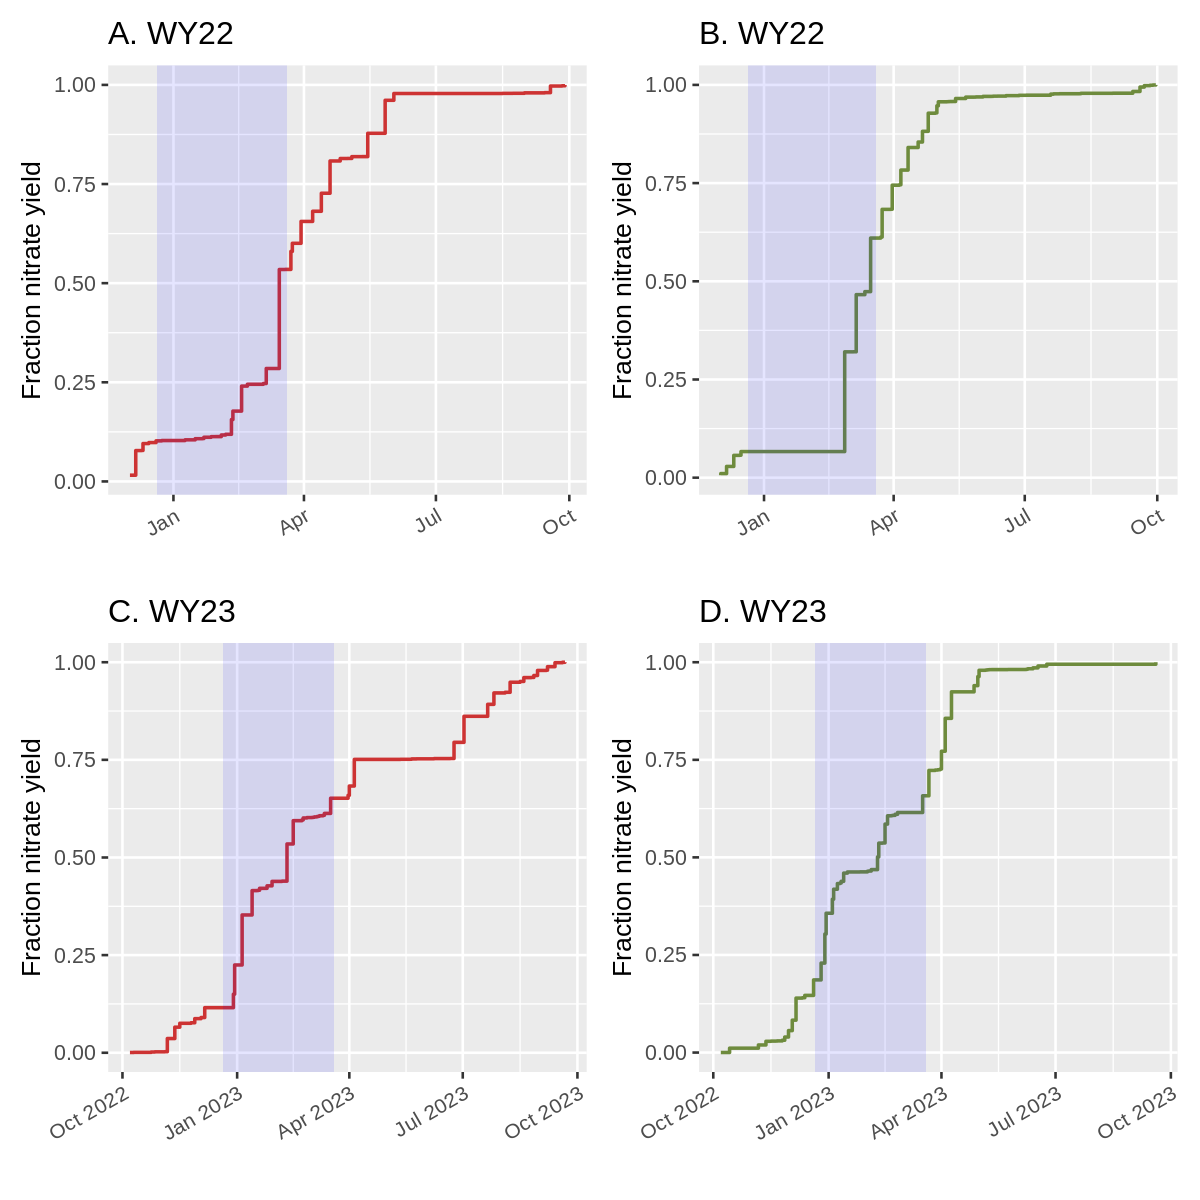

In [9]:
# Define the sampling date ranges
sampling_ranges <- data.frame(
  xmin = as.Date(c("2023-02-09", "2023-03-22", "2023-03-30")),
  xmax = as.Date(c("2023-02-17", "2023-03-26", "2023-04-11"))
)

# Define ice-on
ice_on <- data.frame(
  xmin = as.Date(c("2022-12-21")),
  xmax = as.Date(c("2023-03-20"))
)

# Define ice-on
ice_on22 <- data.frame(
  xmin = as.Date(c("2021-12-21")),
  xmax = as.Date(c("2022-03-20"))
)

# Add cumulative sums grouped by site
combined_data_wade_23 <- combined_data_wade_23 %>%
  arrange(Site, Date) %>%  # Ensure data is ordered by site and date
  group_by(Site) %>%
  mutate(cumulative_water_yield = cumsum(water_yield_mm),
         cumulative_constit_yield = cumsum(constit_yield_mm)) %>%
  mutate(percent_cum_water_yield = cumsum(water_yield_mm)/sum(water_yield_mm),
        percent_cum_nitrate_yield = cumsum(constit_yield_mm)/sum(constit_yield_mm)) %>%
  ungroup()

# Add cumulative sums grouped by site
combined_data_hungerford_23 <- combined_data_hungerford_23 %>%
  arrange(Site, Date) %>%  # Ensure data is ordered by site and date
  group_by(Site) %>%
  mutate(cumulative_water_yield = cumsum(water_yield_mm),
         cumulative_constit_yield = cumsum(constit_yield_mm)) %>%
  mutate(percent_cum_water_yield = cumsum(water_yield_mm)/sum(water_yield_mm),
        percent_cum_nitrate_yield = cumsum(constit_yield_mm)/sum(constit_yield_mm)) %>%
  ungroup()

############2022

# Add cumulative sums grouped by site
combined_data_wade_22 <- combined_data_wade_22 %>%
  arrange(Site, Date) %>%  # Ensure data is ordered by site and date
  group_by(Site) %>%
  mutate(cumulative_water_yield = cumsum(water_yield_mm),
         cumulative_constit_yield = cumsum(constit_yield_mm)) %>%
  mutate(percent_cum_water_yield = cumsum(water_yield_mm)/sum(water_yield_mm),
        percent_cum_nitrate_yield = cumsum(constit_yield_mm)/sum(constit_yield_mm)) %>%
  ungroup()

# Add cumulative sums grouped by site
combined_data_hungerford_22 <- combined_data_hungerford_22 %>%
  arrange(Site, Date) %>%  # Ensure data is ordered by site and date
  group_by(Site) %>%
  mutate(cumulative_water_yield = cumsum(water_yield_mm),
         cumulative_constit_yield = cumsum(constit_yield_mm)) %>%
  mutate(percent_cum_water_yield = cumsum(water_yield_mm)/sum(water_yield_mm),
        percent_cum_nitrate_yield = cumsum(constit_yield_mm)/sum(constit_yield_mm)) %>%
  ungroup()

options(repr.plot.width = 10, repr.plot.height = 10) 

# Plot for cumulative nitrate yield
Wade_WY23 <- ggplot(combined_data_wade_23, aes(x = Date, y = percent_cum_nitrate_yield, color = Site)) +
  geom_step(size = 1) +  # Stepwise line
  scale_color_manual(values = c("Hungerford" = "#CD3333", "Wade" = "darkolivegreen4")) +
  # Add shaded bands for sampling and ice-on
  geom_rect(data = ice_on, aes(xmin = xmin, xmax = xmax, ymin = -Inf, ymax = Inf), 
            fill = "blue", alpha = 0.1, inherit.aes = FALSE) +
  #geom_rect(data = sampling_ranges, aes(xmin = xmin, xmax = xmax, ymin = -Inf, ymax = Inf), 
            #fill = "black", alpha = 0.3, inherit.aes = FALSE) +
  labs(x = "",
       #y = "Cumulative NO3 yield (kg NO3 km-2)",
       y = "Fraction nitrate yield",
       title = "D. WY23") +
  theme_grey(base_size = 16) +
  theme(legend.position="none") +
  theme(axis.text.x = element_text(angle = 30, hjust=1))

Wade_WY22 <- ggplot(combined_data_wade_22, aes(x = Date, y = percent_cum_nitrate_yield, color = Site)) +
  geom_step(size = 1) +  # Stepwise line
  scale_color_manual(values = c("Hungerford" = "#CD3333", "Wade" = "darkolivegreen4")) +
  # Add shaded bands for sampling and ice-on
  geom_rect(data = ice_on22, aes(xmin = xmin, xmax = xmax, ymin = -Inf, ymax = Inf), 
            fill = "blue", alpha = 0.1, inherit.aes = FALSE) +
  #geom_rect(data = sampling_ranges, aes(xmin = xmin, xmax = xmax, ymin = -Inf, ymax = Inf), 
            #fill = "black", alpha = 0.3, inherit.aes = FALSE) +
  labs(x = "",
       #y = "Cumulative NO3 yield (kg NO3 km-2)",
       y = "Fraction nitrate yield",
       title = "B. WY22") +
  theme_grey(base_size = 16) +
  theme(legend.position="none") +
  theme(axis.text.x = element_text(angle = 30, hjust=1))

Hungerford_WY23 <- ggplot(combined_data_hungerford_23, aes(x = Date, y = percent_cum_nitrate_yield, color = Site)) +
  geom_step(size = 1) +  # Stepwise line
  scale_color_manual(values = c("Hungerford" = "#CD3333", "Wade" = "darkolivegreen4")) +
  # Add shaded bands for sampling and ice-on
  geom_rect(data = ice_on, aes(xmin = xmin, xmax = xmax, ymin = -Inf, ymax = Inf), 
            fill = "blue", alpha = 0.1, inherit.aes = FALSE) +
  #geom_rect(data = sampling_ranges, aes(xmin = xmin, xmax = xmax, ymin = -Inf, ymax = Inf), 
            #fill = "black", alpha = 0.3, inherit.aes = FALSE) +
  labs(x = "",
       #y = "Cumulative NO3 yield (kg NO3 km-2)",
       y = "Fraction nitrate yield",
       title = "C. WY23") +
  theme_grey(base_size = 16) +
  theme(legend.position="none") +
  theme(axis.text.x = element_text(angle = 30, hjust=1))

Hungerford_WY22 <- ggplot(combined_data_hungerford_22, aes(x = Date, y = percent_cum_nitrate_yield, color = Site)) +
  geom_step(linewidth = 1) +  # Stepwise line
  scale_color_manual(values = c("Hungerford" = "#CD3333", "Wade" = "darkolivegreen4")) +
  # Add shaded bands for sampling and ice-on
  geom_rect(data = ice_on22, aes(xmin = xmin, xmax = xmax, ymin = -Inf, ymax = Inf), 
            fill = "blue", alpha = 0.1, inherit.aes = FALSE) +
  #geom_rect(data = sampling_ranges, aes(xmin = xmin, xmax = xmax, ymin = -Inf, ymax = Inf), 
            #fill = "black", alpha = 0.3, inherit.aes = FALSE) +
  labs(x = "",
       #y = "Cumulative NO3 yield (kg NO3 km-2)",
       y = "Fraction nitrate yield",
       title = "A. WY22") +
  theme_grey(base_size = 16) +
  theme(legend.position="none") +
  theme(axis.text.x = element_text(angle = 30, hjust=1))

# Combine the two plots side-by-side
#library(patchwork)
#Hungerford_WY23 + Wade_WY23

# Arrange the plots in a 2x2 grid
final_plot <- (Hungerford_WY22 | Wade_WY22) / (Hungerford_WY23 | Wade_WY23)

#options(repr.plot.width = 20, repr.plot.height = 20) 

# Print the final plot
print(final_plot)

# Save combined plot
ggsave(plot = final_plot, width = 20, 
       height = 20, dpi = 300, 
       file = file.path(output_dir, "WY22_WY23_Hungerford_Wade_NO3_cumulative.png"))

In [14]:
combined_data_hungerford_23

X,storm_id,start,end,tot_q_m3,tot_constit_mgN,duration_hrs,water_yield_mm,constit_yield_mm,intensity_m3_hr,Date,Site,Season,run_id,filter_para,sf_thresh,cumulative_water_yield,cumulative_constit_yield,percent_cum_water_yield,percent_cum_nitrate_yield
<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<date>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
37,storm_37,2022-10-07 18:45:00,2022-10-09 01:15:00,17065.976,48712553,30.75,0.35480199,1.0127350,554.9911,2022-10-07,Hungerford,non-winter,"FC = 0.996, SFT = 0.1",0.996,0.1,0.3548020,1.012735,0.0007430317,0.0006087678
38,storm_38,2022-10-10 01:30:00,2022-10-11 05:30:00,11634.482,29130915,26.00,0.24188111,0.6056323,447.4801,2022-10-10,Hungerford,non-winter,"FC = 0.996, SFT = 0.1",0.996,0.1,0.5966831,1.618367,0.0012495829,0.0009728210
39,storm_39,2022-10-24 21:15:00,2022-10-27,24465.604,71796823,50.75,0.50864041,1.4926574,482.0809,2022-10-24,Hungerford,non-winter,"FC = 0.996, SFT = 0.1",0.996,0.1,1.1053235,3.111025,0.0023147854,0.0018700762
40,storm_40,2022-10-27 01:00:00,2022-10-28 09:15:00,15901.491,37726261,32.50,0.33059234,0.7843298,489.2767,2022-10-27,Hungerford,non-winter,"FC = 0.996, SFT = 0.1",0.996,0.1,1.4359158,3.895355,0.0030071169,0.0023415467
41,storm_41,2022-11-04 22:45:00,2022-11-05 10:45:00,11765.561,24324215,16.00,0.24460626,0.5057009,735.3476,2022-11-04,Hungerford,non-winter,"FC = 0.996, SFT = 0.1",0.996,0.1,1.6805221,4.401055,0.0035193751,0.0026455299
42,storm_42,2022-11-06 21:00:00,2022-11-11 02:45:00,1013830.912,2701899269,148.25,21.07756573,56.1725420,6838.6571,2022-11-06,Hungerford,non-winter,"FC = 0.996, SFT = 0.1",0.996,0.1,22.7580878,60.573597,0.0476603351,0.0364115529
43,storm_43,2022-11-12 01:15:00,2022-11-15 16:45:00,801603.109,2327479627,99.00,16.66534530,48.3883498,8097.0011,2022-11-12,Hungerford,non-winter,"FC = 0.996, SFT = 0.1",0.996,0.1,39.4234331,108.961947,0.0825611558,0.0654983998
44,storm_44,2022-11-16 17:45:00,2022-11-22 04:00:00,210522.774,794276516,140.00,4.37677284,16.5130253,1503.7341,2022-11-16,Hungerford,non-winter,"FC = 0.996, SFT = 0.1",0.996,0.1,43.8002060,125.474973,0.0917270603,0.0754245874
45,storm_45,2022-11-25 16:30:00,2022-11-27 12:15:00,34978.891,109098891,51.50,0.72721187,2.2681682,679.2018,2022-11-25,Hungerford,non-winter,"FC = 0.996, SFT = 0.1",0.996,0.1,44.5274178,127.743141,0.0932499985,0.0767880119


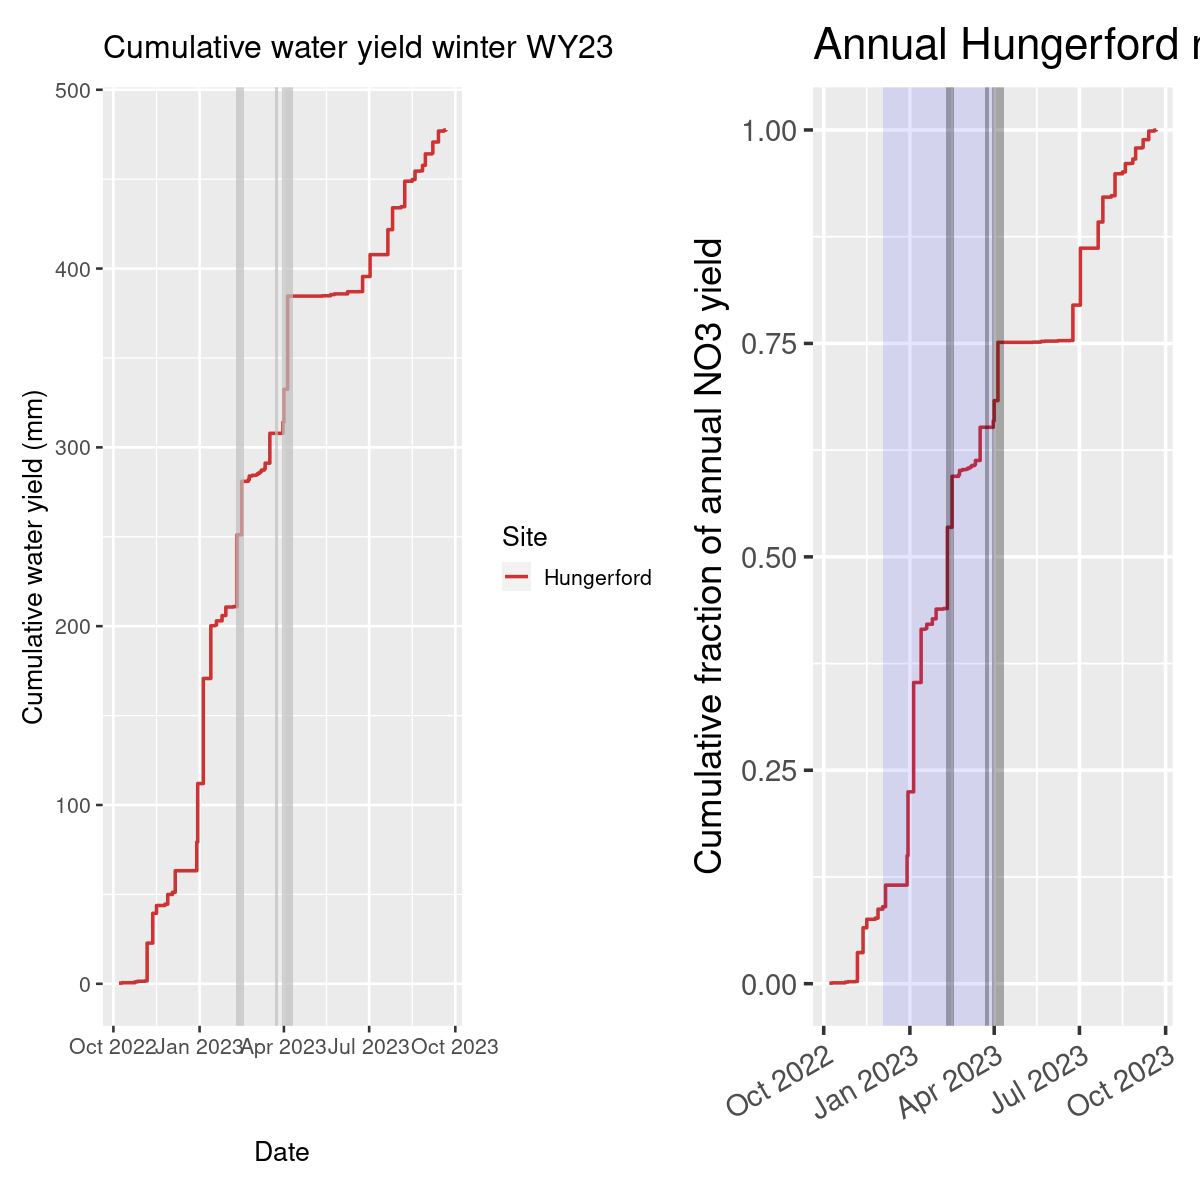

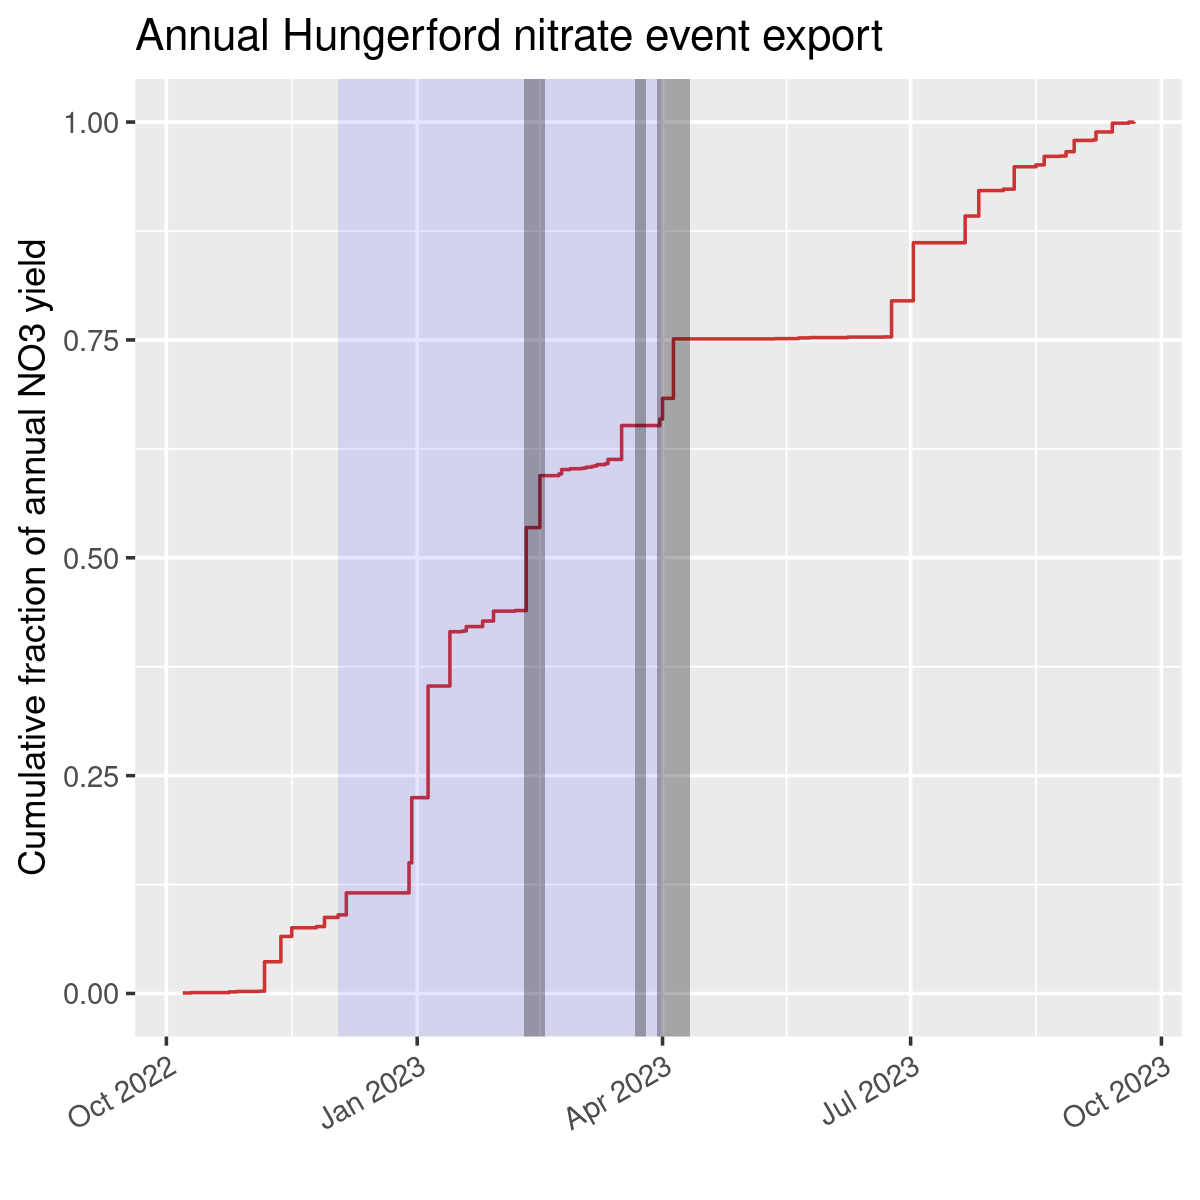

In [15]:
# Define the sampling date ranges
sampling_ranges <- data.frame(
  xmin = as.Date(c("2023-02-09", "2023-03-22", "2023-03-30")),
  xmax = as.Date(c("2023-02-17", "2023-03-26", "2023-04-11"))
)

# Define ice-on
ice_on <- data.frame(
  xmin = as.Date(c("2022-12-03")),
  xmax = as.Date(c("2023-04-01"))
)

# Add cumulative sums grouped by site
combined_data_hungerford_23 <- combined_data_hungerford_23 %>%
  arrange(Site, Date) %>%  # Ensure data is ordered by site and date
  group_by(Site) %>%
  mutate(cumulative_water_yield = cumsum(water_yield_mm),
         cumulative_constit_yield = cumsum(constit_yield_mm)) %>%
  mutate(percent_cum_water_yield = cumsum(water_yield_mm)/sum(water_yield_mm),
        percent_cum_nitrate_yield = cumsum(constit_yield_mm)/sum(constit_yield_mm)) %>%
  ungroup()

options(repr.plot.width = 10, repr.plot.height = 10) 

# Plot for cumulative water yield
p1 <- ggplot(combined_data_hungerford_23, aes(x = Date, y = cumulative_water_yield, color = Site)) +
  geom_step(size = 1) +  # Stepwise line
  scale_color_manual(values = c("Hungerford" = "#CD3333", "Wade" = "darkolivegreen4")) +
  # Add shaded bands
  geom_rect(data = sampling_ranges, aes(xmin = xmin, xmax = xmax, ymin = -Inf, ymax = Inf), 
            fill = "grey", alpha = 0.7, inherit.aes = FALSE) +
  labs(x = "Date",
       y = "Cumulative water yield (mm)",
       title = "Cumulative water yield winter WY23") +
  theme_grey(base_size = 16)

# Plot for cumulative nitrate yield
p2 <- ggplot(combined_data_hungerford_23, aes(x = Date, y = percent_cum_nitrate_yield, color = Site)) +
  geom_step(size = 1) +  # Stepwise line
  scale_color_manual(values = c("Hungerford" = "#CD3333", "Wade" = "darkolivegreen4")) +
  # Add shaded bands for sampling and ice-on
  geom_rect(data = ice_on, aes(xmin = xmin, xmax = xmax, ymin = -Inf, ymax = Inf), 
            fill = "blue", alpha = 0.1, inherit.aes = FALSE) +
  geom_rect(data = sampling_ranges, aes(xmin = xmin, xmax = xmax, ymin = -Inf, ymax = Inf), 
            fill = "black", alpha = 0.3, inherit.aes = FALSE) +
  labs(x = "",
       #y = "Cumulative NO3 yield (kg NO3 km-2)",
       y = "Cumulative fraction of annual NO3 yield",
       title = "Annual Hungerford nitrate event export") +
  theme_grey(base_size = 22) +
  theme(legend.position="none") +
  theme(axis.text.x = element_text(angle = 30, hjust=1))

# Combine the two plots side-by-side
library(patchwork)
p1 + p2

ggsave(plot = p1, width = 10, height = 10, dpi = 300, filename = "hungerford_WY23_wateryield.png")
ggsave(plot = p2, width = 10, height = 10, dpi = 300, filename = "hungerford_WY23_nitrateyield.png")

print(p2)

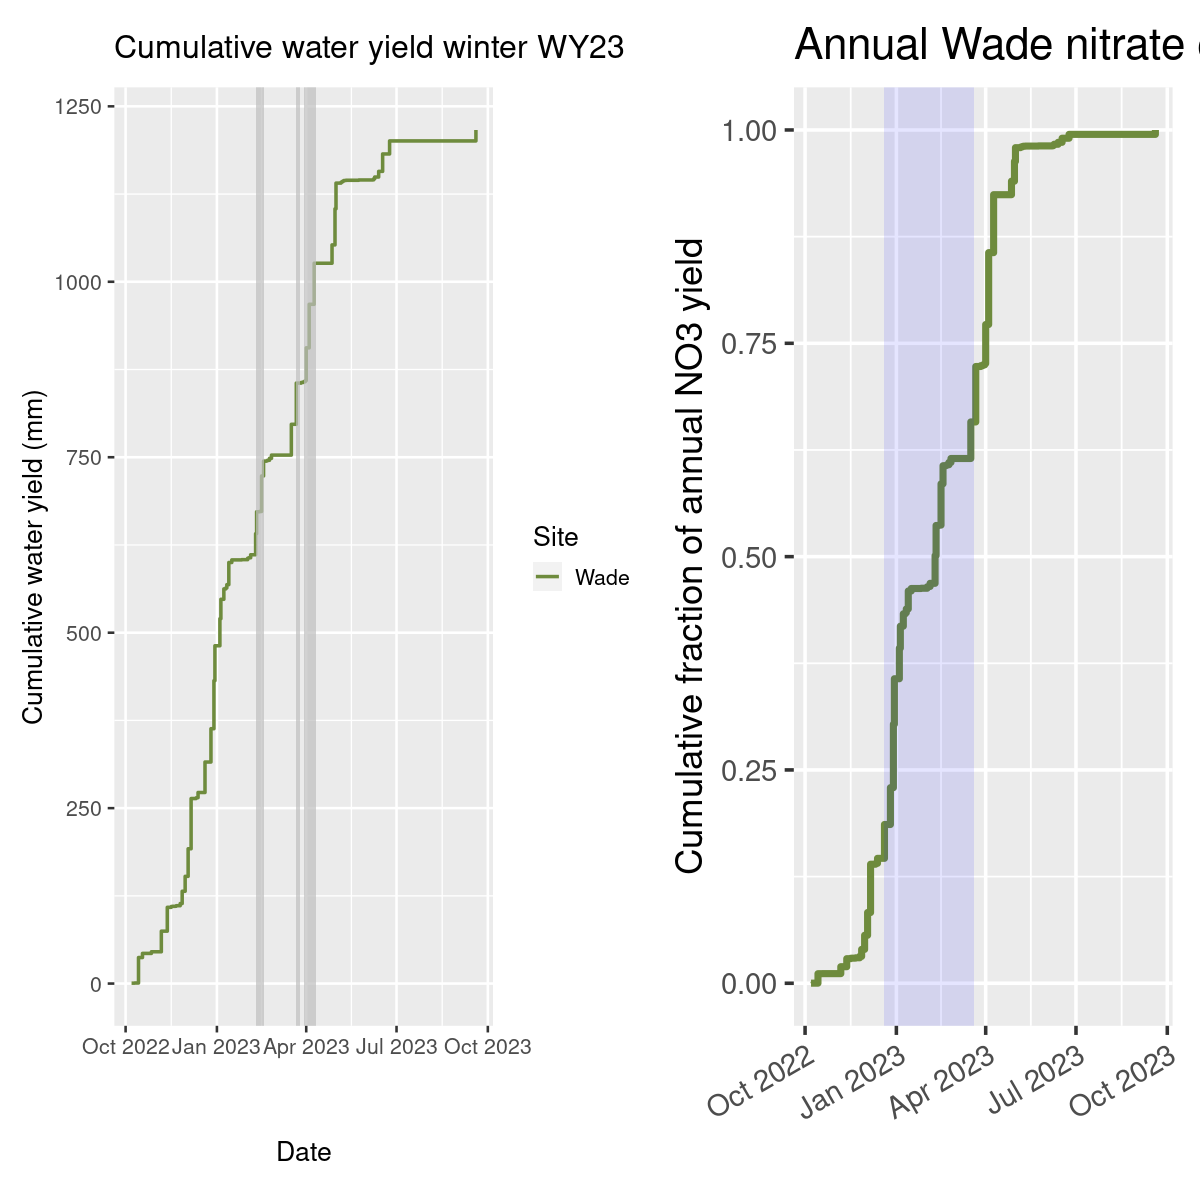

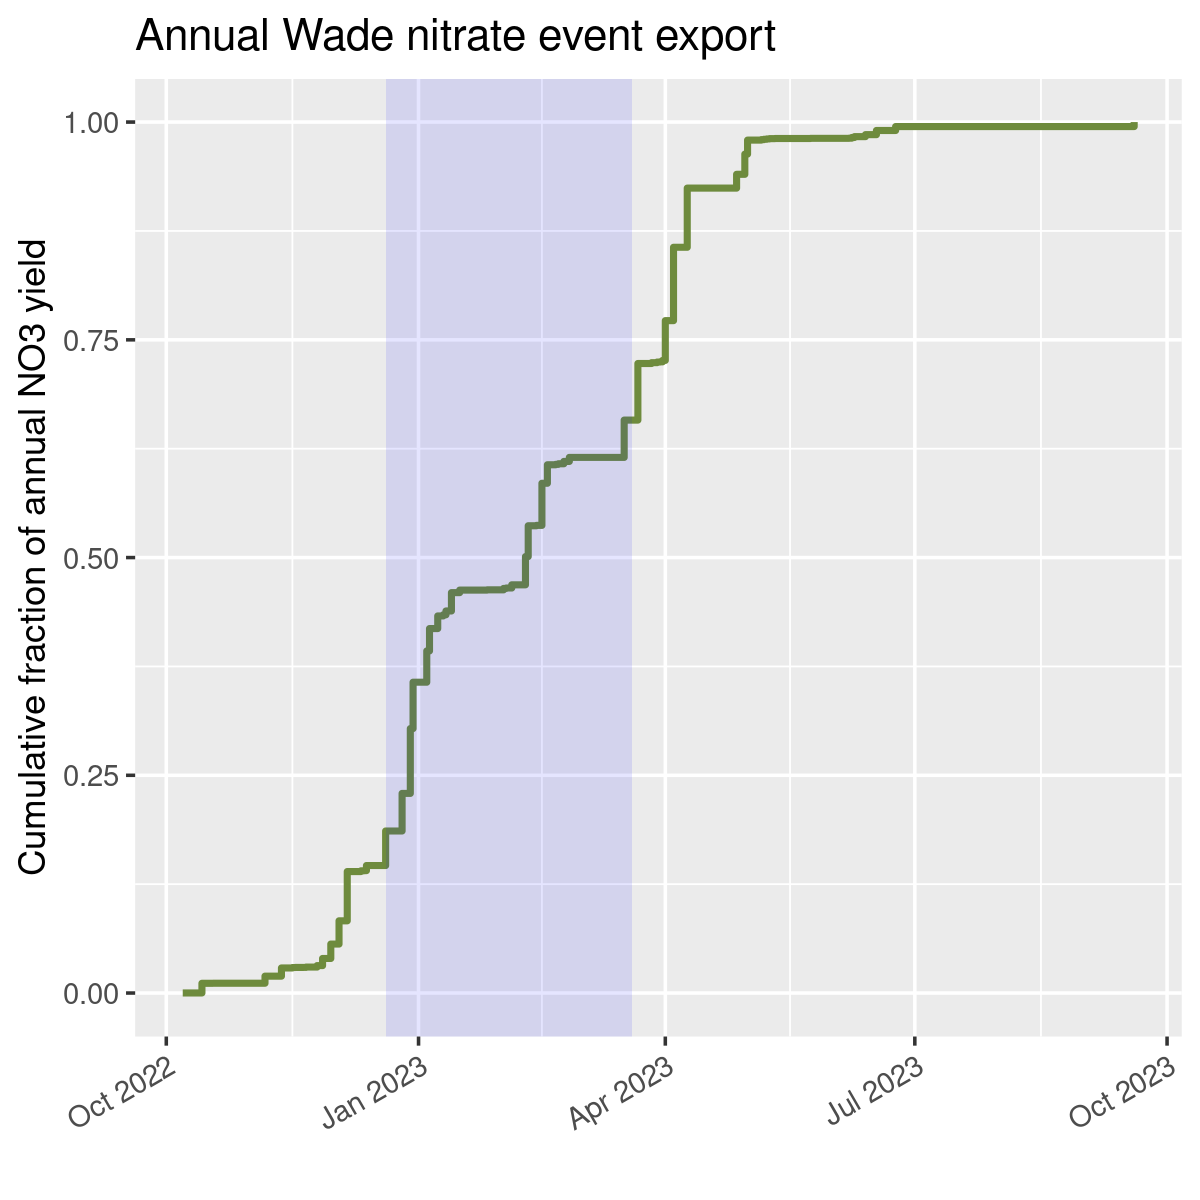

In [23]:
# Define the sampling date ranges
sampling_ranges <- data.frame(
  xmin = as.Date(c("2023-02-09", "2023-03-22", "2023-03-30")),
  xmax = as.Date(c("2023-02-17", "2023-03-26", "2023-04-11"))
)

# Define ice-on
ice_on <- data.frame(
  xmin = as.Date(c("2022-12-20")),
  xmax = as.Date(c("2023-03-20"))
)

# Add cumulative sums grouped by site
combined_data_wade_23 <- combined_data_wade_23 %>%
  arrange(Site, Date) %>%  # Ensure data is ordered by site and date
  group_by(Site) %>%
  mutate(cumulative_water_yield = cumsum(water_yield_mm),
         cumulative_constit_yield = cumsum(constit_yield_mm)) %>%
  mutate(percent_cum_water_yield = cumsum(water_yield_mm)/sum(water_yield_mm),
        percent_cum_nitrate_yield = cumsum(constit_yield_mm)/sum(constit_yield_mm)) %>%
  ungroup()

options(repr.plot.width = 10, repr.plot.height = 10) 

# Plot for cumulative water yield
p1 <- ggplot(combined_data_wade_23, aes(x = Date, y = cumulative_water_yield, color = Site)) +
  geom_step(size = 1) +  # Stepwise line
  scale_color_manual(values = c("Hungerford" = "#CD3333", "Wade" = "darkolivegreen4")) +
  # Add shaded bands
  geom_rect(data = sampling_ranges, aes(xmin = xmin, xmax = xmax, ymin = -Inf, ymax = Inf), 
            fill = "grey", alpha = 0.7, inherit.aes = FALSE) +
  labs(x = "Date",
       y = "Cumulative water yield (mm)",
       title = "Cumulative water yield winter WY23") +
  theme_grey(base_size = 16)

# Plot for cumulative nitrate yield
p2 <- ggplot(combined_data_wade_23, aes(x = Date, y = percent_cum_nitrate_yield, color = Site)) +
  geom_step(linewidth = 2) +  # Stepwise line
  scale_color_manual(values = c("Hungerford" = "#CD3333", "Wade" = "darkolivegreen4")) +
  # Add shaded bands for sampling and ice-on
  geom_rect(data = ice_on, aes(xmin = xmin, xmax = xmax, ymin = -Inf, ymax = Inf), 
            fill = "blue", alpha = 0.1, inherit.aes = FALSE) +
  #geom_rect(data = sampling_ranges, aes(xmin = xmin, xmax = xmax, ymin = -Inf, ymax = Inf), 
            #fill = "black", alpha = 0.3, inherit.aes = FALSE) +
  labs(x = "",
       #y = "Cumulative NO3 yield (kg NO3 km-2)",
       y = "Cumulative fraction of annual NO3 yield",
       title = "Annual Wade nitrate event export") +
  theme_grey(base_size = 22) +
  theme(legend.position="none") +
  theme(axis.text.x = element_text(angle = 30, hjust=1))

# Combine the two plots side-by-side
library(patchwork)
p1 + p2

ggsave(plot = p1, width = 10, height = 10, dpi = 300, filename = "wade_WY23_wateryield.png")
ggsave(plot = p2, width = 10, height = 10, dpi = 300, filename = "wade_WY23_nitrateyield.png")

print(p2)

# Soil resin NO3 availability

In [16]:
##### Plot soil available NO3 for all Stream transects

# Define ice-on
ice_on <- data.frame(
  xmin = as.Date(c("2022-12-03")),
  xmax = as.Date(c("2023-04-12"))
)

# Filter data for Nitrate species
nitrate_data <- resin_data_wy23 %>%
  filter(Species == "Nitrate") %>%
  arrange(Site, Transect, Pit, Date) %>%
  group_by(Site, Transect, Pit) %>%
  mutate(cumulative_ug_cm2 = cumsum(ug_cm2_month)) %>%
  ungroup()

# Define the sampling date ranges for shading
sampling_ranges <- data.frame(
  xmin = as.Date(c("2023-02-09", "2023-03-22", "2023-03-30")),
  xmax = as.Date(c("2023-02-11", "2023-03-25", "2023-04-11"))
)

# Plotting ranges
plotting_ranges <- data.frame(
  xmin = as.Date(c("2022-10-01")),
  xmax = as.Date(c("2023-09-30"))
)

# Plot cumulative nitrate with faceting and line color by Pit
p <- ggplot(nitrate_data, aes(x = Date, y = ug_cm2_month, color = factor(Pit))) +
  # Add shaded bands for sampling and ice-on
  geom_rect(data = ice_on, aes(xmin = xmin, xmax = xmax, ymin = -Inf, ymax = Inf), 
            fill = "blue", alpha = 0.1, inherit.aes = FALSE) +
  geom_rect(data = sampling_ranges, aes(xmin = xmin, xmax = xmax, ymin = -Inf, ymax = Inf), 
            fill = "black", alpha = 0.3, inherit.aes = FALSE) +
  geom_line(size = 1) +  # Line plot for cumulative nitrate
  facet_wrap(~ Site + Transect, scales = "free_y") +  # Facet by Site and Transect
  scale_color_viridis_d(name = "Pit") +  # Use a color palette for Pit
  labs(x = "",
       y = "Available nitrate (ug/cm²/month)",
       title = "Available soil nitrate in WY23") +
  scale_x_date(limits = as.Date(c("2022-10-01", "2023-09-30"))) +
  #annotate("text", x = as.Date(c("2022-01-01")), y = 10, label = "soil resin data not yet analyzed"), 
           #color = "darkolivegreen4", hjust = 0, size = 8) +
  theme_grey(base_size = 22) +
  theme(axis.text.x = element_text(angle = 30, hjust=1)) +
  theme(strip.text.x = element_text(size = 20))  # Adjust facet label font size for readability

# Display the plot
print(p)

# Optionally save the plot
#ggsave(plot = p, width = 24, height = 10, dpi = 300, filename = "cumulative_nitrate_faceted.png")


ERROR: Error in filter(., Species == "Nitrate"): object 'resin_data_wy23' not found


In [17]:
##### Plot soil available NO3 for all Stream transects

# Define ice-on
ice_on <- data.frame(
  xmin = as.Date(c("2022-12-03")),
  xmax = as.Date(c("2023-04-12"))
)

# Filter data for Nitrate species
nitrate_data <- resin_data_wy23 %>%
  filter(Species == "Nitrate") %>%
  arrange(Site, Transect, Pit, Date) %>%
  group_by(Site, Transect, Pit) %>%
  mutate(cumulative_ug_cm2 = cumsum(ug_cm2_month)) %>%
  ungroup()

# Define the sampling date ranges for shading
sampling_ranges <- data.frame(
  xmin = as.Date(c("2023-02-09", "2023-03-22", "2023-03-30")),
  xmax = as.Date(c("2023-02-11", "2023-03-25", "2023-04-11"))
)

# Plotting ranges
plotting_ranges <- data.frame(
  xmin = as.Date(c("2022-10-01")),
  xmax = as.Date(c("2023-09-30"))
)

# Plot cumulative nitrate with faceting and line color by Pit
p <- ggplot(nitrate_data, aes(x = Date, y = cumulative_ug_cm2, color = factor(Pit))) +
  # Add shaded bands for sampling and ice-on
  geom_rect(data = ice_on, aes(xmin = xmin, xmax = xmax, ymin = -Inf, ymax = Inf), 
            fill = "blue", alpha = 0.1, inherit.aes = FALSE) +
  geom_rect(data = sampling_ranges, aes(xmin = xmin, xmax = xmax, ymin = -Inf, ymax = Inf), 
            fill = "black", alpha = 0.3, inherit.aes = FALSE) +
  geom_line(size = 1) +  # Line plot for cumulative nitrate
  facet_wrap(~ Site + Transect, scales = "free_y") +  # Facet by Site and Transect
  scale_color_viridis_d(name = "Pit") +  # Use a color palette for Pit
  labs(x = "",
       y = "Cumulative vailable nitrate (ug/cm²/month)",
       title = "Cumulative available soil nitrate in WY23") +
  scale_x_date(limits = as.Date(c("2022-10-01", "2023-09-30"))) +
  #annotate("text", x = as.Date(c("2022-01-01")), y = 10, label = "soil resin data not yet analyzed"), 
           #color = "darkolivegreen4", hjust = 0, size = 8) +
  theme_grey(base_size = 22) +
  theme(axis.text.x = element_text(angle = 30, hjust=1)) +
  theme(strip.text.x = element_text(size = 20))  # Adjust facet label font size for readability

# Display the plot
print(p)

# Optionally save the plot
#ggsave(plot = p, width = 24, height = 10, dpi = 300, filename = "cumulative_nitrate_faceted.png")


ERROR: Error in filter(., Species == "Nitrate"): object 'resin_data_wy23' not found


In [18]:
# Plot cumulative nitrate with faceting in a 1x4 layout and line color by Pit
p <- ggplot(nitrate_data, aes(x = Date, y = cumulative_ug_cm2, color = factor(Pit))) +
  # Add shaded bands for sampling and ice-on
  geom_rect(data = ice_on, aes(xmin = xmin, xmax = xmax, ymin = -Inf, ymax = Inf), 
            fill = "blue", alpha = 0.1, inherit.aes = FALSE) +
  geom_rect(data = sampling_ranges, aes(xmin = xmin, xmax = xmax, ymin = -Inf, ymax = Inf), 
            fill = "black", alpha = 0.3, inherit.aes = FALSE) +
  geom_line(size = 1) +  # Line plot for cumulative nitrate
  facet_wrap(~ Site + Transect, scales = "free_y", nrow = 1) +  # Adjusted to 1 row
  scale_color_viridis_d(name = "Pit") +  # Use a color palette for Pit
  labs(x = "",
       y = "Cumulative NO3 (ug/cm²/month)",
       title = "Cumulative available soil nitrate in winter WY23") +
  scale_x_date(limits = as.Date(c("2022-10-01", "2023-09-30"))) +
  theme_grey(base_size = 22) +
  theme(axis.text.x = element_text(angle = 30, hjust=1)) +
  theme(strip.text.x = element_text(size = 20))  # Adjust facet label font size for readability

# Display the plot
print(p)

# Optionally save the plot
ggsave(plot = p, width = 18, height = 6, dpi = 300, filename = "cumulative_nitrate_faceted_horizontal.png")


ERROR: Error in ggplot(nitrate_data, aes(x = Date, y = cumulative_ug_cm2, color = factor(Pit))): object 'nitrate_data' not found


FOr WY22

In [19]:
################
# LOAD PACKAGES #
################

library(tidyverse)
library(viridis)
library(lubridate)
library(patchwork)

###################
# SET DIRECTORIES #
###################

setwd("~//OneDrive/git-repos/EMMA")

input_dir <- "soil-resins/"
output_dir <- "soil-resins/output"
# event delineation script puts original yields here:

# I've put some here for now:
yield_input_dir <- "soil-resins/"

###########################
# READ IN AND FILTER DATA #
###########################

# Read in cumulative NO3 data
hungerford_yield_data <- read.csv(file.path(yield_input_dir, "Hungerford_WY22_WY23_storm_NO3_yields.csv")) %>%
  mutate(Date = as.Date(start))  # Convert 'start' to Date format (drop time)

wade_yield_data <- read.csv(file.path(yield_input_dir, "Wade_WY22_WY23_storm_NO3_yields.csv")) %>%
  mutate(Date = as.Date(start))  # Convert 'start' to Date format (drop time)

# Define Water Year 2022
wy22_start <- as.Date("2021-10-01")
wy22_end <- as.Date("2022-09-30")

# Define Water Year 2023
wy23_start <- as.Date("2022-10-01")
wy23_end <- as.Date("2023-09-30")

# Filter data for Water Year 2022
hungerford_yield_data_wy22 <- hungerford_yield_data %>%
  filter(Date >= wy22_start & Date <= wy22_end)

# Filter data for Water Year 2022
hungerford_yield_data_wy23 <- hungerford_yield_data %>%
  filter(Date >= wy23_start & Date <= wy23_end)

# Filter data for Water Year 2022
wade_yield_data_wy22 <- wade_yield_data %>%
  filter(Date >= wy22_start & Date <= wy22_end)

# Filter data for Water Year 2022
wade_yield_data_wy23 <- wade_yield_data %>%
  filter(Date >= wy23_start & Date <= wy23_end)

ggplot(hungerford_yield_data_wy22, aes(x=water_yield_mm, y=constit_yield_mm, color=Date)) +
    geom_point(size = 4) +    # Use hollow circles
    geom_smooth(method=lm) +   # Add linear regression line  # (by default includes 95% confidence region)
    xlab("Event water yield (mm)") +
    ylab("Event nitrate yield (kg NO3 km-2)") +
    ggtitle("Hungerford winter WY22 event yield ratios") +
    theme_grey(base_size = 20)

ggplot(wade_yield_data_wy22, aes(x=water_yield_mm, y=constit_yield_mm, color=Date)) +
    geom_point(size = 4) +    # Use hollow circles
    geom_smooth(method=lm) +   # Add linear regression line  # (by default includes 95% confidence region)
    xlab("Event water yield (mm)") +
    ylab("Event nitrate yield (kg NO3 km-2)") +
    ggtitle("Wade winter WY22 event yield ratios") +
    theme_grey(base_size = 20)

Warning message in file(file, "rt"):
“cannot open file 'soil-resins//Wade_WY22_WY23_storm_NO3_yields.csv': No such file or directory”


ERROR: Error in file(file, "rt"): cannot open the connection


`geom_smooth()` using formula = 'y ~ x'


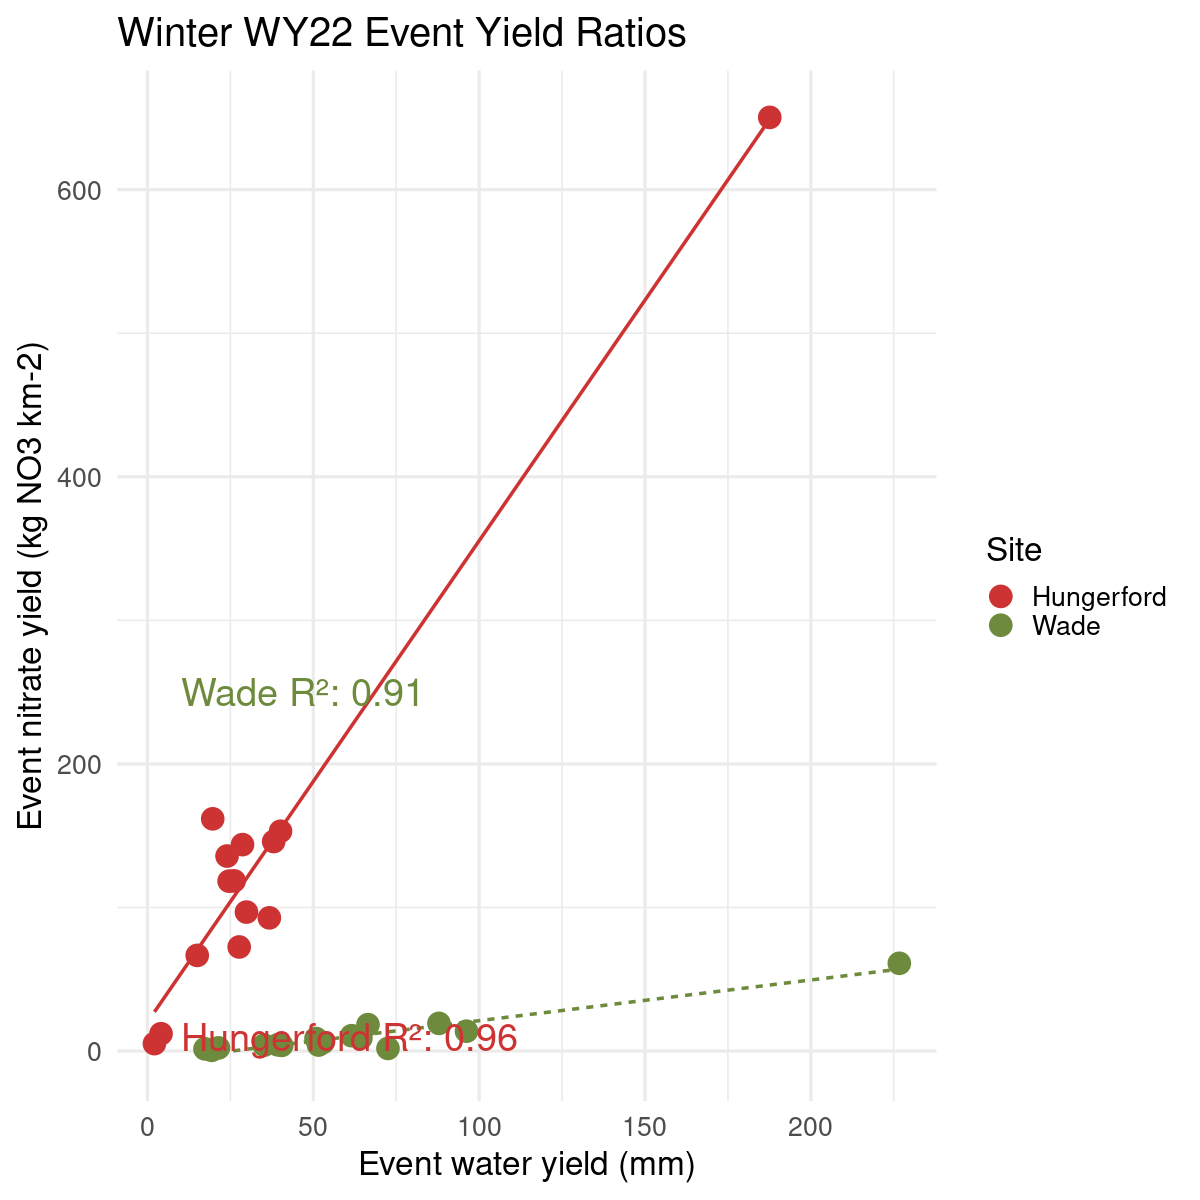

In [20]:
# Load required packages
library(tidyverse)

# Combine Hungerford and Wade data into a single data frame with a site identifier
hungerford_yield_data_wy22 <- hungerford_yield_data_wy22 %>%
  mutate(Site = "Hungerford")

wade_yield_data_wy22 <- wade_yield_data_wy22 %>%
  mutate(Site = "Wade")

combined_data <- bind_rows(hungerford_yield_data_wy22, wade_yield_data_wy22)

# Fit linear models to calculate R² values
hungerford_lm <- lm(constit_yield_mm ~ water_yield_mm, 
                    data = filter(combined_data, Site == "Hungerford"))
hungerford_r2 <- summary(hungerford_lm)$r.squared

wade_lm <- lm(constit_yield_mm ~ water_yield_mm, 
              data = filter(combined_data, Site == "Wade"))
wade_r2 <- summary(wade_lm)$r.squared

# Create the plot

options(repr.plot.width = 10, repr.plot.height = 10) 

ggplot(combined_data, aes(x = water_yield_mm, y = constit_yield_mm, color = Site)) +
  geom_point(size = 6) +
  geom_smooth(method = lm, se = FALSE, aes(linetype = Site)) +
  scale_color_manual(values = c("Hungerford" = "#CD3333", "Wade" = "darkolivegreen4")) +
  labs(x = "Event water yield (mm)",
       y = "Event nitrate yield (kg NO3 km-2)",
       title = "Winter WY22 Event Yield Ratios") +
  theme_minimal(base_size = 20) +
  annotate("text", x = 10, y = 10, label = paste0("Hungerford R²: ", round(hungerford_r2, 2)), 
           color = "#CD3333", hjust = 0, size = 8) +
  annotate("text", x = 10, y = 250, label = paste0("Wade R²: ", round(wade_r2, 2)), 
           color = "darkolivegreen4", hjust = 0, size = 8)